### Git versioning

In [1]:
import git  #Requires Gitpython installed, to install do "$ pip install Gitpython" in your terminal
import pkg_resources
openfisca_france_location = pkg_resources.get_distribution('openfisca-france').location
repo = git.Repo(openfisca_france_location)
repo.git.status()

sha = repo.head.object.hexsha

print "---This notebook have been runed with--- \n","Openfisca-france :", repo.head.object.hexsha, '\n' 
print "Commit short SHA:", repo.git.rev_parse(sha, short=4)
print "Branch: ", repo.git.rev_parse('--abbrev-ref', "HEAD") #equivalent to: $git rev-parse --abbrev-ref HEAD
print "Date (y/m/d):", repo.git.show("-s", '--format=%ci', 'HEAD^')[:-5],"\n"  # equivalent to: $git show -s --format=%ci HEAD^

print "Openfisca-core :", git.Repo(pkg_resources.get_distribution('openfisca-core').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('openfisca-core').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "Openfisca-france-data :", git.Repo(pkg_resources.get_distribution('openfisca-france-data').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('openfisca-france-data').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "OpenFisca-Aggregates :", git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]
print "OpenFisca-Survey-Manager :", git.Repo(pkg_resources.get_distribution('OpenFisca-Survey-Manager').location).head.object.hexsha, ' Date:', git.Repo(pkg_resources.get_distribution('OpenFisca-Aggregates').location).git.show("-s", '--format=%ci', 'HEAD^')[:-5]

---This notebook have been runed with--- 
Openfisca-france : 03f19d8d1c056fec5562f592814f9526b3e6c0a2 

Commit short SHA: 03f19
Branch:  mensualisation_wip
Date (y/m/d): 2016-06-01 08:56:21  

Openfisca-core : 4076f591f4bcb571391b65a989e1603fdc4cb759  Date: 2016-02-24 16:11:57 
Openfisca-france-data : 4581a82fd1456cbe0bdd86ab1b57db6fef37c8cf  Date: 2016-05-31 15:46:50 
OpenFisca-Aggregates : fd210d8cfdf6ed68f173d9d5c3eab4a4302ed2b9  Date: 2016-04-04 11:35:03 
OpenFisca-Survey-Manager : 868512d24307aa75cfa7bbbf8420542960963966  Date: 2016-04-04 11:35:03 


### Imports

In [2]:
%matplotlib inline
from __future__ import division

from openfisca_core import periods
from openfisca_plugin_aggregates.tests.reform.test_aggregates_mensualized import create_survey_scenario
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
from numpy import (datetime64, logical_and as and_, logical_not as not_, logical_or as or_, logical_xor as xor_,
maximum as max_, minimum as min_, round)


#Faire des filtres pour Mahdi survey_scenario.create_data_frame_by_entity_key_plural

pd.set_option('expand_frame_repr', False)  #utile quand on utilise pandas en mode console
pd.set_option("display.max_rows",201)
pd.set_option("display.max_columns",201)

# Create Survey Scenario

In [3]:
period = periods.period(2009)

In [4]:
period.this_year.this_month

Period((u'month', Instant((2009, 1, 1)), 1))

In [5]:
survey_scenario = create_survey_scenario(2009)
survey_scenario.new_simulation()

In [6]:
for month in range(3,4):
    gain_u = (pd.Series(
     survey_scenario.simulation.calculate("utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
survey_scenario.simulation.calculate("utility_ir_annuel", "2009-{}".format(month))
        ))
    gain_m =  (
        survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
        survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))
pd.DataFrame({'gain_utilite':gain_u, 'gain_argent':gain_m})

,gain_argent,gain_utilite
0,0.000000,0.000000e+00
1,0.000000,0.000000e+00
2,0.000000,0.000000e+00
3,11.335938,4.145841e-07
4,0.000000,0.000000e+00
5,303.910156,1.295056e-05
6,0.000000,0.000000e+00
7,0.000000,0.000000e+00
8,-74.833008,-3.805413e-06
9,0.000000,0.000000e+00


In [7]:
print survey_scenario.compute_aggregate('rsa_mensuel')/10**9
print survey_scenario.compute_aggregate('rsa')/10**9

27.3828495177
22.0467180875


##### weights

In [8]:
weight_foyers = survey_scenario.simulation.calculate_add('weight_foyers', period = period).astype(float)
weight_menages = survey_scenario.simulation.calculate_add('wprm', period = period).astype(float)
weight_familles = survey_scenario.simulation.calculate_add('weight_familles', period = period).astype(float)
weight_individus = survey_scenario.simulation.calculate_add('weight_individus', period = period).astype(float)

In [9]:
print weight_foyers.shape , "foyers fiscaux"
print weight_menages.shape , "ménages"
print weight_familles.shape, "familles"
print weight_individus.shape, "individus"

(59874,) foyers fiscaux
(49016,) ménages
(55306,) familles
(112359,) individus


In [10]:
print weight_foyers.sum() , "foyers fiscaux"
print weight_menages.sum() , "ménages"
print weight_familles.sum(), "familles"
print weight_individus.sum(), "individus"

33262201.0 foyers fiscaux
27299608.0 ménages
30475517.0 familles
61228244.0 individus


In [11]:
variable = 'revdisp_mensuel_ir_mensuel'
monthly_df = pd.DataFrame(
                dict((column_name+"_"+period, survey_scenario.simulation.calculate_add(column_name, period)) 
                for period in ['{}-{}'.format( 2009, str(month).zfill(2)) for month in range(1, 13)] for column_name in [variable]) #TODO mensualize : allow for periods
                )
#monthly_df.T

In [12]:
#monthly_df.T
monthly_df['revdisp_mensuel_ir_mensuel_2009-09'].mean()

2562.1338

In [13]:
survey_scenario.compute_aggregate('revdisp_mensuel_annuel')/27000000

30971.156008867594

In [14]:
survey_scenario.compute_aggregate('revdisp_mensuel_ir_mensuel')/27000000

30749.742025517487

In [15]:
survey_scenario.compute_aggregate('revdisp_mensuel_ir_mensuel')/27000000

30749.742025517487

In [16]:
pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')).value_counts()#TODO !

 0.000000e+00    37530
 1.220703e-04     2228
-1.220703e-04     2199
 6.103516e-05     1800
 2.441406e-04     1791
-6.103516e-05     1662
-2.441406e-04     1591
-3.051758e-05     1246
-4.882812e-04      948
 3.051758e-05      946
 4.882812e-04      879
 1.525879e-05      654
-1.525879e-05      530
-9.765625e-04      506
-3.662109e-04      499
 3.662109e-04      438
 9.155273e-05      372
-1.831055e-04      360
 9.765625e-04      356
 1.831055e-04      291
 7.324219e-04      273
-7.629395e-06      270
-7.324219e-04      269
 7.629395e-06      262
-4.577637e-05      209
 1.953125e-03      183
-1.953125e-03      139
-9.155273e-05      122
-1.464844e-03      109
 1.464844e-03      106
 2.288818e-05       93
-3.051758e-04       78
-3.906250e-03       62
 3.051758e-04       62
 4.577637e-05       58
 3.906250e-03       56
 6.103516e-04       52
-6.103516e-04       50
-2.929688e-03       48
-1.220703e-03       46
 2.929688e-03       41
 1.192093e-07       37
-3.814697e-06       35
 3.814697e-

In [17]:
survey_scenario.compute_aggregate('irpp')

-48038862065.683533

In [18]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('mini_mensuel','2009-{}'.format(month))).mean()


124.687
66.3229
114.181
180.594
136.797
135.994
136.076
134.618
133.74
140.21
129.986
130.273


In [19]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('revdisp_mensuel_annuel','2009-{}'.format(month))).mean()


2552.75
2483.99
2540.7
2547.51
2507.43
2517.38
2523.58
2538.83
2567.66
2590.56
3199.38
2600.03


In [20]:
for month in range(1,13):
    print pd.Series(survey_scenario.simulation.calculate('revdisp_mensuel_ir_mensuel','2009-{}'.format(month))).mean()


2551.58
2484.06
2540.94
2549.31
2508.64
2517.8
2523.75
2537.29
2562.13
2582.3
3021.07
2586.95


In [21]:
for month in range(1,13):
    print 'annuel', pd.Series(survey_scenario.simulation.calculate('utility_ir_annuel','2009-{}'.format(month))).mean()
    print 'mensuel', pd.Series(survey_scenario.simulation.calculate('utility_ir_mensuel','2009-{}'.format(month))).mean()

annuel -0.000369867
mensuel -0.000369675
annuel -0.000373569
mensuel -0.000373396
annuel -0.00037033
mensuel -0.000370159
annuel -0.000368888
mensuel -0.000368697
annuel -0.000371163
mensuel -0.000370982
annuel -0.000370823
mensuel -0.000370672
annuel -0.000370587
mensuel -0.000370441
annuel -0.000370088
mensuel -0.000369984
annuel -0.000369374
mensuel -0.000369326
annuel -0.000369142
mensuel -0.000369079
annuel -0.000358717
mensuel -0.000359862
annuel -0.000369153
mensuel -0.000369172


In [22]:
decote_monthly = pd.Series(survey_scenario.simulation.calculate_add("decote_gain_fiscal_mensuel_times_12")/12)
decote_annual =  pd.Series(survey_scenario.simulation.calculate_add('decote_gain_fiscal'))

In [23]:
(pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009')) < 0 ).value_counts()

False    49016
dtype: int64

In [24]:
revdisp = pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009'))
revdisp = pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel','2009'))
#revdisp[revdisp<0]

In [25]:
decote = survey_scenario.simulation.calculate('decote_menage')
decote_mensuel = survey_scenario.simulation.calculate_add('decote_mensuel_menage')

In [26]:
survey_scenario.compute_aggregate("utility_ir_annuel")

-118364.70183011307

In [27]:
survey_scenario.compute_aggregate("ra_rsa_i_mensualise")

552969854465.4801

In [28]:
for presta in ['rev_trav_mensuel' , 'pen_mensuel' , 'psoc_mensuel','ppe']:
    print presta
    for month in range(1,13):
        print pd.Series(survey_scenario.simulation.calculate(presta,'2009-{}'.format(month))).mean()


rev_trav_mensuel
813.492
810.8
811.185
810.757
811.691
813.136
814.277
817.74
824.117
835.849
836.74
841.17
pen_mensuel
241.897
242.088
243.89
242.802
245.302
248.539
250.039
254.043
260.873
255.497
526.99
258.776
psoc_mensuel
181.405
123.034
170.863
182.062
138.264
137.477
137.529
136.075
135.177
141.63
131.38
131.637
ppe
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515
6.49515


In [29]:
print pd.Series(survey_scenario.simulation.calculate('irpp')* weight_foyers).sum()
print survey_scenario.compute_aggregate('irpp')

-48055084885.6
-48038862065.7


## Compare IRPP on monthly basis vs. on annual basis

In [30]:
print survey_scenario.compute_aggregate('irpp')/10**9
print survey_scenario.compute_aggregate('irpp_mensuel')/10**9
print u"l'impôt mensuel mène à un prélèvement de {} euros en plus".format(survey_scenario.compute_aggregate('irpp_mensuel')-survey_scenario.compute_aggregate('irpp') )

-48.0388620657
-53.8233637481
l'impôt mensuel mène à un prélèvement de -5784501682.38 euros en plus


In [31]:
pd.Series(survey_scenario.simulation.calculate("irpp") == survey_scenario.simulation.calculate("irpp_mensuel")).value_counts()

False    35248
True     24626
dtype: int64

In [32]:
#np.testing.assert_array_almost_equal(survey_scenario.simulation.calculate('irpp'),survey_scenario.simulation.calculate_add("irpp_mensuel"), decimal = -0,
#                                    )

#### Lambda compensation

In [33]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))

In [34]:
execute_time_consuming_graph = False
if execute_time_consuming_graph == True : 
    lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
    lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
    lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
    filtr_near0 = np.abs(lambda_compensation)-0.2 >= 0
    lambda_compensation[filtr_near0 ].hist(bins = 70000, weights = pd.Series(weight_foyers)[filtr_near0 ].values)
    plt.xlim(-20,20)

In [35]:
if execute_time_consuming_graph == True :
    lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
    lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
    lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
    lambda_compensation[np.abs(lambda_compensation)-0.2 >= 0 ].hist(bins = 700000)
    plt.xlim(-20,20)

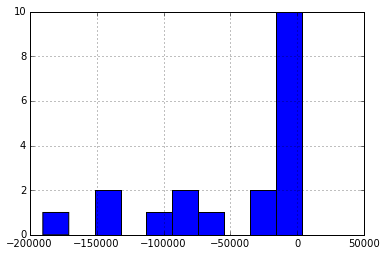

In [36]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
lambda_compensation[np.abs(lambda_compensation)-2000 >= 0 ].hist(bins = 10)
#plt.xlim(-20,20)

#### Pourcentage du sample à 0

In [37]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
#lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
#lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)==0].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda égal à 0 ".format(round(prct1,2)*100)

50.0 % du sample à un lambda égal à 0 


#### Pourcentage du sample presque à 0

In [38]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)<0.01].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda égal à 0 ".format(round(prct1,2)*100)

90.0 % du sample à un lambda égal à 0 


#### Pourcentage du sample > ou < à  0

In [39]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[lambda_compensation<0].shape[0]/lambda_compensation.shape[0]
prct2 = lambda_compensation[lambda_compensation>0].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda < à 0 ".format(round(prct1,2)*100)
print "{} % du sample à un lambda > à 0 ".format(round(prct2,2)*100)

23.0 % du sample à un lambda < à 0 
28.0 % du sample à un lambda > à 0 


In [40]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[lambda_compensation<-0.01].shape[0]/lambda_compensation.shape[0]
prct2 = lambda_compensation[lambda_compensation>0.01].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda < à -0.01 ".format(round(prct1,2)*100)
print "{} % du sample à un lambda > à 0.01 ".format(round(prct2,2)*100)

2.0 % du sample à un lambda < à -0.01 
7.0 % du sample à un lambda > à 0.01 


In [41]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[lambda_compensation<-0.01].shape[0]/lambda_compensation[np.abs(lambda_compensation)>0.01].shape[0]
prct2 = lambda_compensation[lambda_compensation>0.01].shape[0]/lambda_compensation[np.abs(lambda_compensation)>0.01].shape[0]
print "{} % du sample à un lambda < à -0.01 ".format(round(prct1,2)*100)
print "{} % du sample à un lambda > à 0.01 ".format(round(prct2,2)*100)

25.0 % du sample à un lambda < à -0.01 
75.0 % du sample à un lambda > à 0.01 


#### Pourcentage du sample entre -20 et 20

In [42]:
lambda_compensation = pd.Series(survey_scenario.simulation.calculate("lambda_compensation"))
lambda_compensation.loc[(lambda_compensation == -np.inf)|lambda_compensation.isnull()]=0
lambda_compensation.loc[(lambda_compensation == np.inf)|lambda_compensation.isnull()]=0
prct1 = lambda_compensation[np.abs(lambda_compensation)>70].shape[0]/lambda_compensation.shape[0]
print "{} % du sample à un lambda supérieur  à 70 ".format(round(prct1,2)*100)

1.0 % du sample à un lambda supérieur  à 70 


#### Lambda compensation négatif du à la décote ?

In [43]:
pd.Series(survey_scenario.simulation.calculate_add("decote_mensuel_times_12")/12).mean()

179.2312

In [44]:
decote_monthly = pd.Series(survey_scenario.simulation.calculate_add("decote_mensuel_times_12")/12)
decote_annual =  pd.Series(survey_scenario.simulation.calculate_add("decote"))

In [45]:
filtre_unequal_decote = decote_monthly != decote_annual

In [46]:
lambda_compensation[filtre_unequal_decote].shape

(23034,)

(-20, 20)

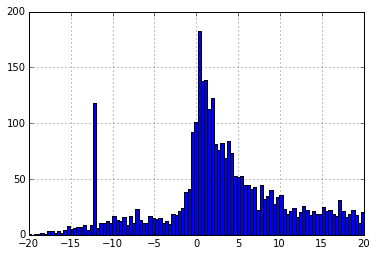

In [47]:
lambda_compensation[filtre_unequal_decote&
                    (np.abs(lambda_compensation)>.1)&
                    (np.abs(lambda_compensation)<100)].hist(bins = 500)
plt.xlim(-20,20)

In [48]:
to_graph = lambda_compensation[filtre_unequal_decote&
                    (np.abs(lambda_compensation)>.1)&
                    (np.abs(lambda_compensation)<100)]


In [49]:
poids = pd.Series(weight_foyers)[
        filtre_unequal_decote&
        (np.abs(lambda_compensation)>.1)&
        (np.abs(lambda_compensation)<100)]

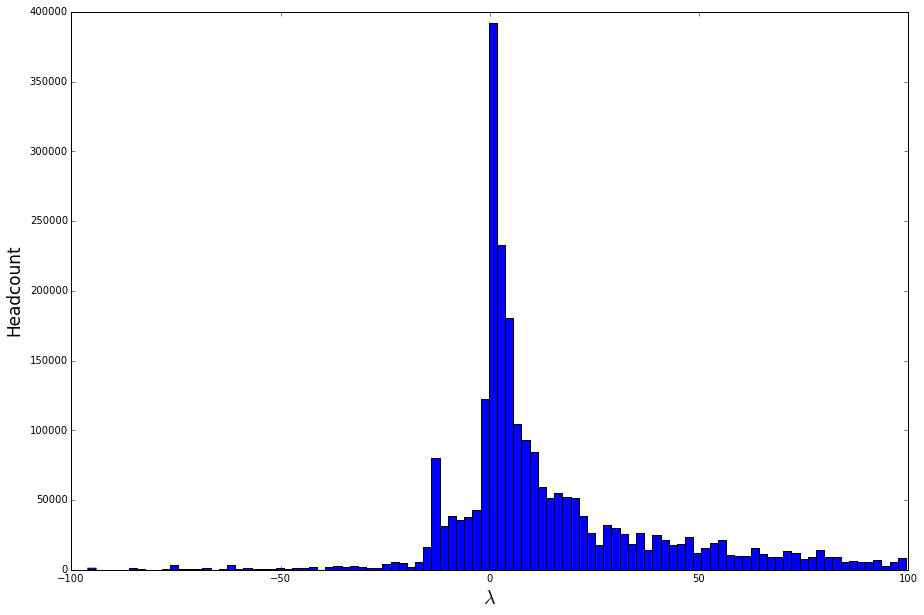

In [50]:
plt.figure(figsize=(15,10))
plt.hist(to_graph.values, bins = 100, weights = poids.values)
plt.xlabel(r'$\lambda$',fontsize = 20 )
plt.ylabel('Headcount',fontsize = 17)

In [51]:
lambda_zero = pd.Series(lambda_compensation == 0 )
pd.Series(weight_foyers)[lambda_zero].sum()



16291830.0

In [52]:
index_exceptional_lambda = lambda_compensation[np.abs(lambda_compensation)>100].index

In [53]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation'])['foyers_fiscaux']
df['decote_gain_fiscal_mensuel'] = df.decote_gain_fiscal_mensuel_times_12/12
df.iloc[index_exceptional_lambda]

,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation,decote_gain_fiscal_mensuel
4,252.503723,146.684967,-108.488831,-1942.908325,202.905991,12.223747
128,218.857468,0.000000,-209.427597,-3179.729248,170.195419,0.000000
234,238.712494,0.000000,-149.862518,-1831.854126,134.682770,0.000000
405,269.017517,2914.672363,0.400000,-25.741962,-784.258911,242.889359
468,-0.000000,0.000000,-425.854980,-5981.230957,156.542755,0.000000
588,133.102509,0.000000,-466.692474,-4444.631348,102.284203,0.000000
590,248.447495,0.000000,-120.657516,-5307.629395,515.870605,0.000000
1892,231.562500,0.000000,-171.312500,-5638.628906,382.971466,0.000000
2104,232.910004,0.000000,-167.269989,-3604.862549,246.613953,0.000000
2246,254.062500,0.000000,-103.812500,-4504.193848,508.653381,0.000000


In [54]:
survey_scenario.simulation.calculate("irpp_mensuel","2009-08")[4]

-971.45416

In [55]:
df["difference"] = np.abs(df.decote_gain_fiscal- df.decote_gain_fiscal_mensuel)>0.01
df[lambda_compensation == -12].difference.value_counts()

True     102
False      5
dtype: int64

In [56]:
df.shape

(59874, 7)

In [57]:
df[lambda_compensation == -12][['decote_gain_fiscal', 'decote_gain_fiscal_mensuel', 'lambda_compensation',"irpp",'irpp_mensuel' ]]

,decote_gain_fiscal,decote_gain_fiscal_mensuel,lambda_compensation,irpp,irpp_mensuel
743,157.952423,239.030014,-12,-392.142731,-0
1391,257.068756,273.102509,-12,-94.793732,-0
1666,175.872437,262.359161,-12,-338.382690,-0
2221,262.664978,244.310043,-12,-78.005035,-0
2560,211.432495,207.514969,-12,-231.702515,-0
3334,197.922501,82.885002,-12,-272.232483,-0
3482,231.988785,257.262482,-12,-170.033646,-0
3983,137.402496,0.000000,-12,-453.792511,-0
4108,254.827515,0.000000,-12,-101.517456,-0
4374,252.522507,0.000000,-12,-108.432480,-0


In [58]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
df.lambda_compensation[df.lambda_compensation< -70] = 0

In [59]:
df[np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)+1>0].shape

(59874, 5)

(-20, 20)

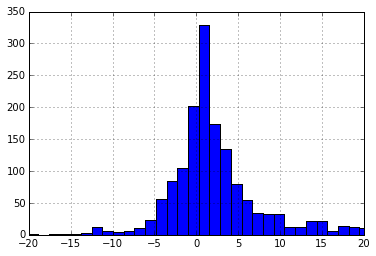

In [60]:
df.lambda_compensation[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-1<0)
                      & (np.abs(df.lambda_compensation)>0.1)].hist(bins = 100)
plt.xlim(-20,20)

In [61]:
df.lambda_compensation[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-0.1>0)
                      & (np.abs(df.lambda_compensation)>0.1)].mean()

7.6328607

In [62]:
df[(np.abs(df.decote_gain_fiscal-df.decote_gain_fiscal_mensuel_times_12)-0.1>0)
                      & (np.abs(df.lambda_compensation)>0.1)]

,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
7,-0.000000,223.836288,-2966.810059,-7234.854004,17.263165
10,0.000000,39.012215,153.500000,-41.694618,-15.259514
38,76.113708,42.886242,-576.658875,-897.256348,6.671482
57,121.699951,185.417496,-347.900146,-156.747498,-6.593362
67,-0.000000,136.980972,-950.567383,-1734.394775,9.895069
74,133.872498,0.000000,-464.382507,-1367.037476,23.325294
85,16.202515,0.000000,-817.392456,-5112.797852,63.060120
101,220.742493,0.000000,-203.772522,-754.381226,32.424900
157,49.032501,59.248749,-718.902466,-741.326172,0.374299
159,83.599976,0.000000,69.500000,-210.421295,-48.331738


In [63]:
df[df.lambda_compensation<-1]

,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
10,0.000000,39.012215,153.500000,-41.694618,-15.259514
57,121.699951,185.417496,-347.900146,-156.747498,-6.593362
159,83.599976,0.000000,69.500000,-210.421295,-48.331738
219,39.092499,209.385391,-748.722534,-93.510429,-10.501281
273,44.823730,218.486313,-578.528809,-57.541183,-10.806465
372,-0.000000,-0.000000,-1407.664917,-1190.384888,-1.852259
450,-0.000000,0.000000,-1409.734985,272.399994,-14.318733
554,-0.000000,-0.000000,-1104.777588,-1007.197327,-1.059908
722,152.197510,232.167496,-73.407471,166.502502,-39.218346
743,157.952423,239.030014,-392.142731,-0.000000,-12.000000


In [64]:
df[df.lambda_compensation<-1][df.decote_gain_fiscal> df.decote_gain_fiscal_mensuel_times_12]

/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
159,83.599976,0.000000,69.500000,-210.421295,-48.331738
1886,118.345001,0.000000,171.535004,-707.201294,-61.473377
2200,163.817490,0.000000,1253.000000,-258.154144,-14.472346
2221,262.664978,244.310043,-78.005035,-0.000000,-12.000000
2245,182.545105,27.949804,110.000000,-166.983917,-30.216427
2433,147.207520,131.401535,147.000000,131.180328,-1.291402
2560,211.432495,207.514969,-231.702515,-0.000000,-12.000000
3170,6.792513,0.000000,191.800003,-564.493103,-47.317608
3334,197.922501,82.885002,-272.232483,-0.000000,-12.000000
3444,260.589996,0.000000,909.200012,302.976807,-8.001186


## Compensated irpp

In [65]:
print max(pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')))
print min(pd.Series(survey_scenario.simulation.calculate_add('compensated_irpp_mensuel') -  survey_scenario.simulation.calculate_add('irpp')))

0.09375
-0.03125


In [66]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation', 'compensated_irpp_mensuel'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
#df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
#df.lambda_compensation[df.lambda_compensation< -70] = 0
#df.compensated_irpp_mensuel = df.compensated_irpp_mensuel
df

,compensated_irpp_mensuel,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
0,0.000000,5.894867,10.871246,0.000000,-7.903255,0.000000e+00
1,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000e+00
2,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000e+00
3,-1378.829712,-0.000000,-0.000000,-1378.829712,-1378.829956,1.907349e-06
4,-108.488831,252.503723,12.223747,-108.488831,-1942.908325,2.029060e+02
5,-792.612549,24.462494,24.462494,-792.612549,-792.612366,-2.861023e-06
6,-9160.150391,-0.000000,-0.000000,-9160.150391,-9160.149414,-9.536743e-07
7,-2966.809814,-0.000000,223.836288,-2966.810059,-7234.854004,1.726316e+01
8,0.000000,230.505005,230.504959,0.000000,-0.000000,0.000000e+00
9,0.000000,102.025002,102.025017,0.000000,-0.000000,0.000000e+00


In [67]:
df = survey_scenario.create_data_frame_by_entity_key_plural(['decote_gain_fiscal','decote_gain_fiscal_mensuel_times_12',"irpp",'irpp_mensuel', 'lambda_compensation', 'compensated_irpp_mensuel'])['foyers_fiscaux']
df.decote_gain_fiscal_mensuel_times_12 = df.decote_gain_fiscal_mensuel_times_12/12
#df.lambda_compensation[df.lambda_compensation>70] = 0 #autrement les histogrames prennent trois heures à grapher pour quelques observations
#df.lambda_compensation[df.lambda_compensation< -70] = 0
#df.compensated_irpp_mensuel = df.compensated_irpp_mensuel
df

,compensated_irpp_mensuel,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation
0,0.000000,5.894867,10.871246,0.000000,-7.903255,0.000000e+00
1,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000e+00
2,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000e+00
3,-1378.829712,-0.000000,-0.000000,-1378.829712,-1378.829956,1.907349e-06
4,-108.488831,252.503723,12.223747,-108.488831,-1942.908325,2.029060e+02
5,-792.612549,24.462494,24.462494,-792.612549,-792.612366,-2.861023e-06
6,-9160.150391,-0.000000,-0.000000,-9160.150391,-9160.149414,-9.536743e-07
7,-2966.809814,-0.000000,223.836288,-2966.810059,-7234.854004,1.726316e+01
8,0.000000,230.505005,230.504959,0.000000,-0.000000,0.000000e+00
9,0.000000,102.025002,102.025017,0.000000,-0.000000,0.000000e+00


In [68]:
df[df.compensated_irpp_mensuel - df.irpp<2][['irpp', 'compensated_irpp_mensuel', 'irpp_mensuel']]

,irpp,compensated_irpp_mensuel,irpp_mensuel
0,0.000000,0.000000,-7.903255
1,0.000000,0.000000,-0.000000
2,0.000000,0.000000,-0.000000
3,-1378.829712,-1378.829712,-1378.829956
4,-108.488831,-108.488831,-1942.908325
5,-792.612549,-792.612549,-792.612366
6,-9160.150391,-9160.150391,-9160.149414
7,-2966.810059,-2966.809814,-7234.854004
8,0.000000,0.000000,-0.000000
9,0.000000,0.000000,-0.000000


In [69]:
print survey_scenario.compute_aggregate('compensated_irpp_mensuel')
print survey_scenario.compute_aggregate('irpp')

-48038862125.8
-48038862065.7


In [70]:
impot_mensuel_times_12 = survey_scenario.simulation.calculate("irpp_mensuel", period)*12
lambda_compensation = survey_scenario.simulation.calculate("lambda_compensation", period.this_year)



compensated_irpp = impot_mensuel_times_12/(12 + lambda_compensation)

In [71]:
compensated_irpp[743]

nan

In [72]:
(survey_scenario.simulation.calculate("irpp", period.this_year) == 0)*0

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
compensated_irpp = (survey_scenario.simulation.calculate("irpp", period.this_year) == 0) * 0 + \
                ~(survey_scenario.simulation.calculate("irpp", period.this_year) == 0) * np.nan_to_num(compensated_irpp) ;compensated_irpp[[4,743]]

array([-108.48883057,    0.        ])

In [74]:
compensated_irpp = (
                (survey_scenario.simulation.calculate_add("irpp_mensuel", period) == 0) * #Condition
                (survey_scenario.simulation.calculate("irpp", period.this_year)/12) # on répartit sur l'année
            ) + ~(survey_scenario.simulation.calculate_add("irpp_mensuel", period) == 0) * compensated_irpp #condition opposée
compensated_irpp[[4,743]]

array([-108.48883057,  -32.67856216])

In [75]:
df[df.lambda_compensation.isnull()]

,compensated_irpp_mensuel,decote_gain_fiscal,decote_gain_fiscal_mensuel_times_12,irpp,irpp_mensuel,lambda_compensation


In [76]:
survey_scenario.simulation.calculate_add('irpp')

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [77]:
survey_scenario.compute_aggregate('compensated_irpp_mensuel')

-48038862125.764519

In [78]:
lambda_compensation = survey_scenario.simulation.calculate('lambda_compensation')
np.all(lambda_compensation != np.nan)
lambda_compensation != np.nan
hello = lambda_compensation[1]
assert np.all(np.isfinite(lambda_compensation))


In [79]:
sal_pen_df = survey_scenario.create_data_frame_by_entity_key_plural_with_monthly_basis_selector(['irpp'], ['irpp_mensuel','compensated_irpp_mensuel'])['foyers_fiscaux']

sal_pen_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,59774,59775,59776,59777,59778,59779,59780,59781,59782,59783,59784,59785,59786,59787,59788,59789,59790,59791,59792,59793,59794,59795,59796,59797,59798,59799,59800,59801,59802,59803,59804,59805,59806,59807,59808,59809,59810,59811,59812,59813,59814,59815,59816,59817,59818,59819,59820,59821,59822,59823,59824,59825,59826,59827,59828,59829,59830,59831,59832,59833,59834,59835,59836,59837,59838,59839,59840,59841,59842,59843,59844,59845,59846,59847,59848,59849,59850,59851,59852,59853,59854,59855,59856,59857,59858,59859,59860,59861,59862,59863,59864,59865,59866,59867,59868,59869,59870,59871,59872,59873
irpp,0.000000,0,0,-1378.829712,-108.488831,-792.612549,-9160.150391,-2966.810059,0,0,153.500000,-2335.952637,0,-1309.255005,0,-2104.827637,0.000000,166.152588,-4151.707031,-3237.300049,-2124.675049,-877.314941,-601.944092,737.799988,0.000000,-1072.575317,-1089.632202,-433.722321,0,0.00000,0,-1132.755005,-1087.487549,0,0.000000,778.040283,-79.077332,-5260.950195,-576.658875,-1171.852295,-157.122513,-1710.030518,-8168.149902,-502.418640,-7868.875000,-7178.475098,-7609.375000,0,-700.632874,0,0,0,0,0,0.0000,-557.202698,-219.863785,-347.900146,0.00000,-100.774826,-1554.069702,0,-1177.890015,0,-1053.290039,-176.052505,-25070.472656,-950.567383,0.000000,-7382.575195,-1490.895020,-902.614990,-956.515015,0.000000,-464.382507,-19810.775391,-306.282501,-839.862549,-2150.909424,0.000000,-2422.667725,128.607910,221.765015,-781.379395,0,-817.392456,-1687.875000,-2443.069336,-712.655029,-1361.430542,-504.814941,-450.965210,0.000000,0,-244.102661,-607.182739,0,-1016.015015,-2660.685059,0,...,0.0000,-601.302246,0.000000,-1093.915039,0,-474.908691,-948.814697,-2816.445068,-1445.395020,0,-1058.574951,-2052.189941,-595.650024,-267.612518,-1248.135010,-499.992493,-4005.529785,-1531.915039,0,-319.692688,-202.414978,-321.545105,0.00000,-3714.446777,-2004.694702,-687.770264,0,-748.354553,-1434.970215,-424.152496,-244.002533,-163.542511,0.000000,-202.538803,-597.724976,-9831.699219,-257.890350,0,-1735.875000,-4654.606934,720.587402,0,0,0,0,-414.822540,0,-551.364990,0.000000,-1313.714966,0,-694.752075,0,0,0,-1803.330322,-2510.689941,-122.678955,0,-837.510071,-881.647339,0,-1013.949707,0,-2144.870117,-1179.814941,714.760010,-820.122070,-6603.650879,-476.045013,0,-994.734985,-1435.174683,-699.807495,-322.212524,0,0,-1994.087402,0,0,0,0,0,0,-2146.514893,-15008.900391,-315.072510,0,-7257.776367,-2652.369873,-3179.347412,0.000000,-2050.929932,-198.942520,-1824.654785,-12667.373047,0,0.000000,0,0
compensated_irpp_mensuel_2009-01,0.000000,0,0,-114.902489,0.000000,-66.051056,-763.345947,-4.560170,0,0,-47.092911,-194.662720,0,1.160107,0,-175.402283,0.000000,13.846048,-345.975586,-269.775024,-177.056259,5.842635,-50.162003,61.483326,0.000000,-89.381279,-90.802673,-36.143524,0,0.00000,0,-94.396263,-90.623962,0,0.000000,64.836700,-6.589777,-438.412476,3.267014,-97.654358,-13.093544,-142.502563,-680.679138,-41.868217,-655.739502,-598.206360,-634.114563,0,-58.386074,0,0,0,0,0,0.0000,-46.433563,-18.321983,-28.991678,0.00000,-8.397902,-129.505783,0,0.000000,0,-87.774170,-14.671043,-2089.205811,-12.089419,0.000000,-615.214478,-124.241272,-75.217918,-79.709579,0.000000,0.000000,-1650.897705,-25.523539,-69.988548,-179.242477,0.000000,-201.888992,10.717326,18.480419,-65.114952,0,0.000000,-187.541641,-203.589127,-59.387913,-113.452560,-42.067917,-37.580429,0.000000,0,-20.341888,-50.598564,0,-84.667923,-221.723755,0,...,0.0000,-50.108521,0.000000,-91.159599,0,-39.575726,-79.067886,-234.703735,-160.599442,0,-88.214569,-171.015808,-49.637497,-22.301043,-104.011261,-41.666039,-11.911106,0.000000,0,-26.641056,0.000000,-26.795427,0.00000,-309.537201,-167.057907,-57.314194,0,-62.362877,-119.580856,1.13

In [80]:
survey_scenario.compute_aggregate('compensated_irpp_mensuel')

-48038862125.764519

## Utility annalysis 

In [81]:
survey_scenario.compute_aggregate("utility_ir_annuel") #TODO : find why Nan

-118364.70183011307

In [82]:
print pd.Series(survey_scenario.simulation.calculate_add('utility_ir_annuel','2009')).mean()
print pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel','2009')).mean()
print pd.Series(survey_scenario.simulation.calculate_add('utility_compensated_ir_mensuel','2009')).mean()
print pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel_rsa_mensuel','2009')).mean()

-0.0044317
-0.00443144
-0.0044296
-0.00442503


In [83]:
u_ir_m_rsa_m = pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel_rsa_mensuel','2009'))
u_c_ir = pd.Series(survey_scenario.simulation.calculate_add('utility_compensated_ir_mensuel','2009'))
u_ir_m = pd.Series(survey_scenario.simulation.calculate_add('utility_ir_mensuel','2009'))
u_ir_a = pd.Series(survey_scenario.simulation.calculate_add('utility_ir_annuel','2009'))


In [84]:
print u_ir_m_rsa_m.mean(),1/u_ir_m_rsa_m.mean()
print u_c_ir.mean(),1/u_c_ir.mean()
print u_ir_m.mean(),1/u_ir_m.mean()
print u_ir_a.mean(),1/u_ir_a.mean()

-0.00442503 -225.987086805
-0.0044296 -225.754150544
-0.00443144 -225.66006708
-0.0044317 -225.646954762


In [85]:
print u_c_ir.describe()
print u_ir_m.describe()
print u_ir_a.describe()

count    49016.000000
mean        -0.004430
std          0.000801
min         -0.006125
25%         -0.004956
50%         -0.004458
75%         -0.003898
max         -0.000247
dtype: float64
count    49016.000000
mean        -0.004431
std          0.000801
min         -0.006125
25%         -0.004958
50%         -0.004460
75%         -0.003899
max         -0.000247
dtype: float64
count    49016.000000
mean        -0.004432
std          0.000801
min         -0.006125
25%         -0.004957
50%         -0.004461
75%         -0.003900
max         -0.000247
dtype: float64


In [86]:
print 1/u_c_ir.describe()
print 1/u_ir_m.describe()
print 1/u_ir_a.describe()

count       0.000020
mean     -225.754151
std      1248.919032
min      -163.268352
25%      -201.778805
50%      -224.292949
75%      -256.509733
max     -4055.660513
dtype: float64
count       0.000020
mean     -225.660067
std      1248.181781
min      -163.268352
25%      -201.708609
50%      -224.211819
75%      -256.444102
max     -4055.660513
dtype: float64
count       0.000020
mean     -225.646955
std      1248.757988
min      -163.268352
25%      -201.730532
50%      -224.156762
75%      -256.427650
max     -4055.660513
dtype: float64


(0, 200)

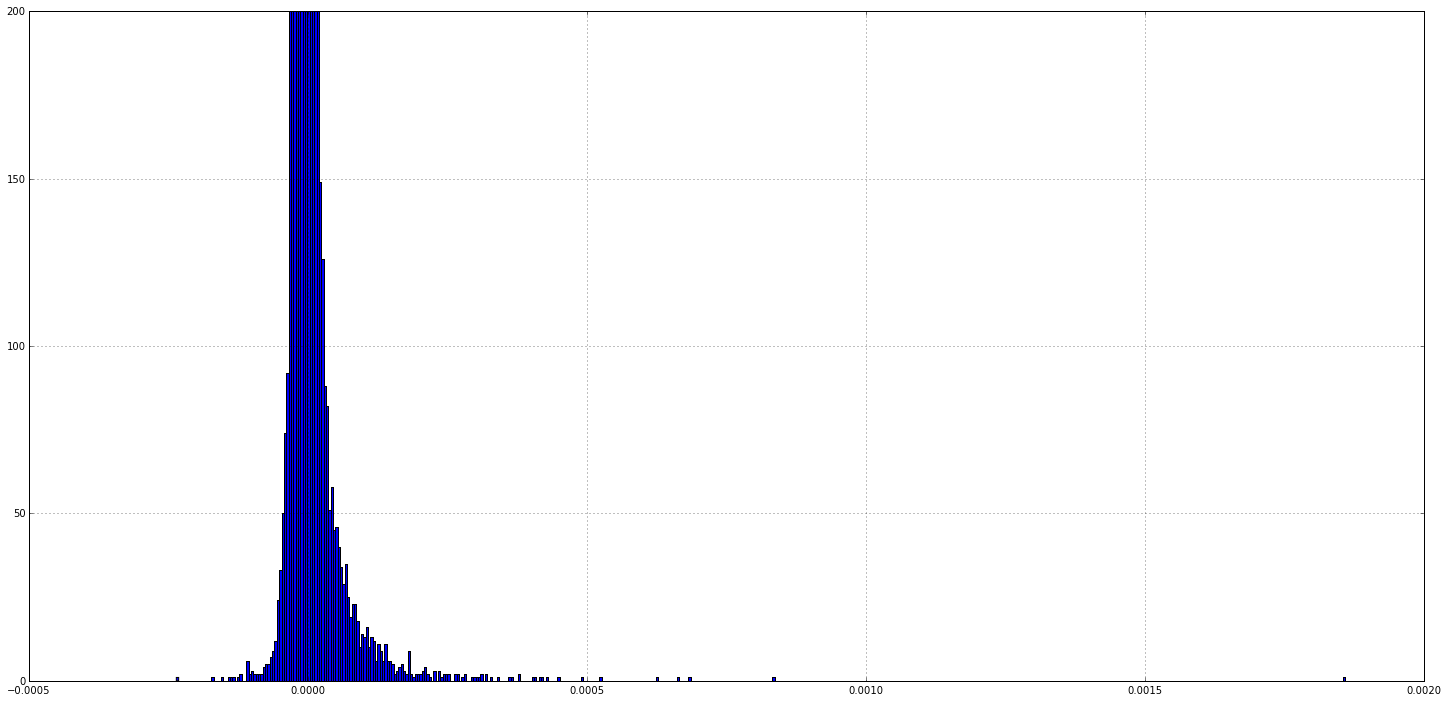

In [87]:
((u_ir_m - u_ir_a)).hist(bins = 500, figsize = (25,12))
plt.ylim(0,200)

In [88]:
((u_ir_m - u_ir_a)<-0.0000001).value_counts()

False    42292
True      6724
dtype: int64

(0, 200)

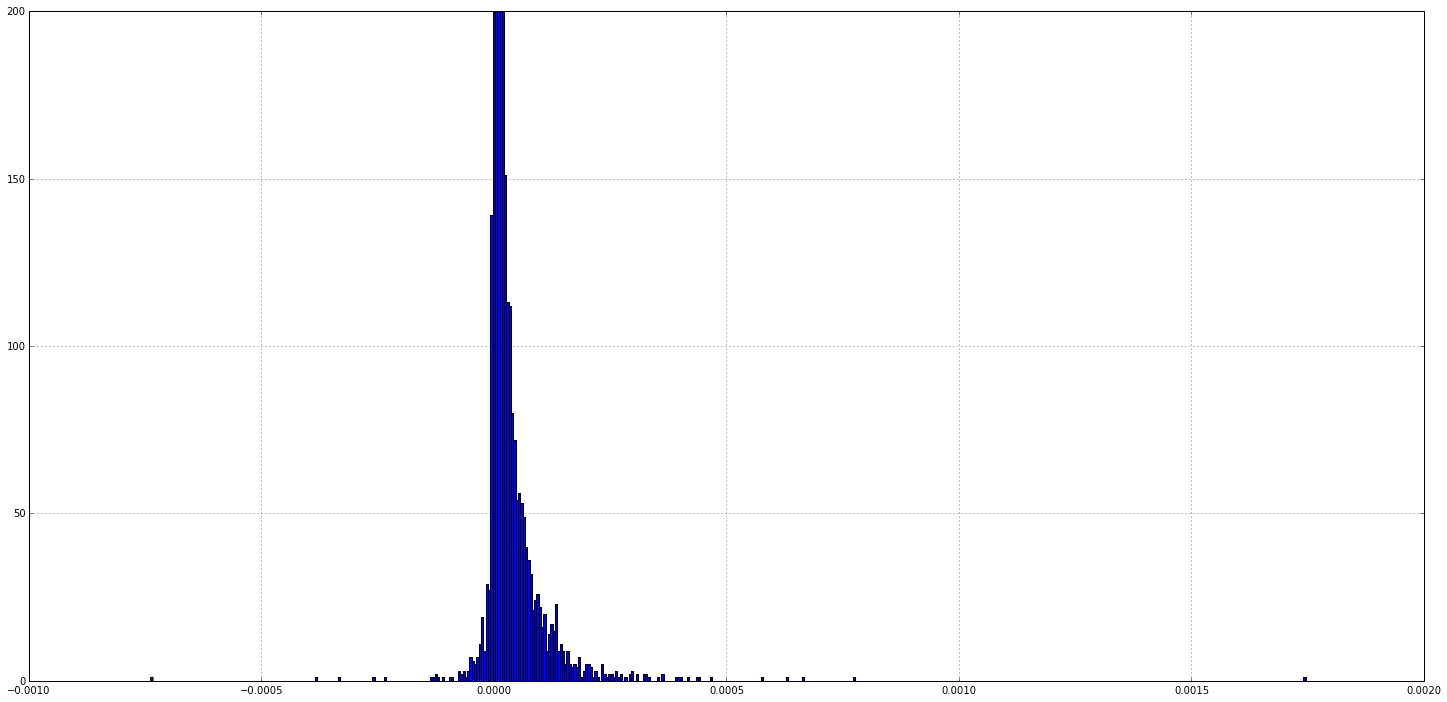

In [89]:
((u_c_ir - u_ir_a)).hist(bins = 500, figsize = (25,12))
plt.ylim(0,200)

In [90]:
((u_c_ir - u_ir_a)<-0.0000001).value_counts()

False    48401
True       615
dtype: int64

##### Graphs with weights

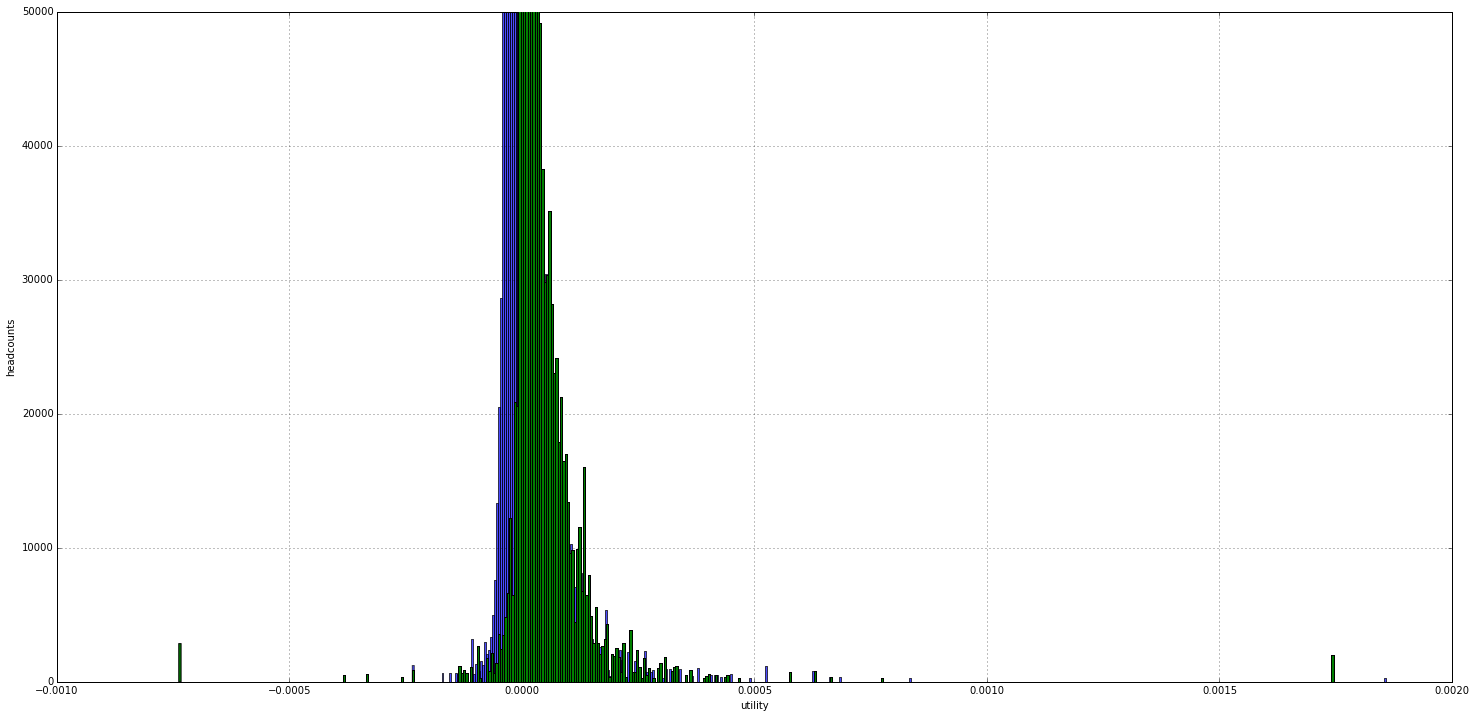

In [91]:
((u_ir_m - u_ir_a)).hist(bins = 500, figsize = (25,12), zorder=1, alpha = 0.7, weights = weight_menages,)
((u_c_ir - u_ir_a)).hist(bins = 500, figsize = (25,12), weights = weight_menages,zorder=10, alpha = 1)
plt.ylim(0,5*10**4)
plt.xlabel('utility')
plt.ylabel('headcounts')

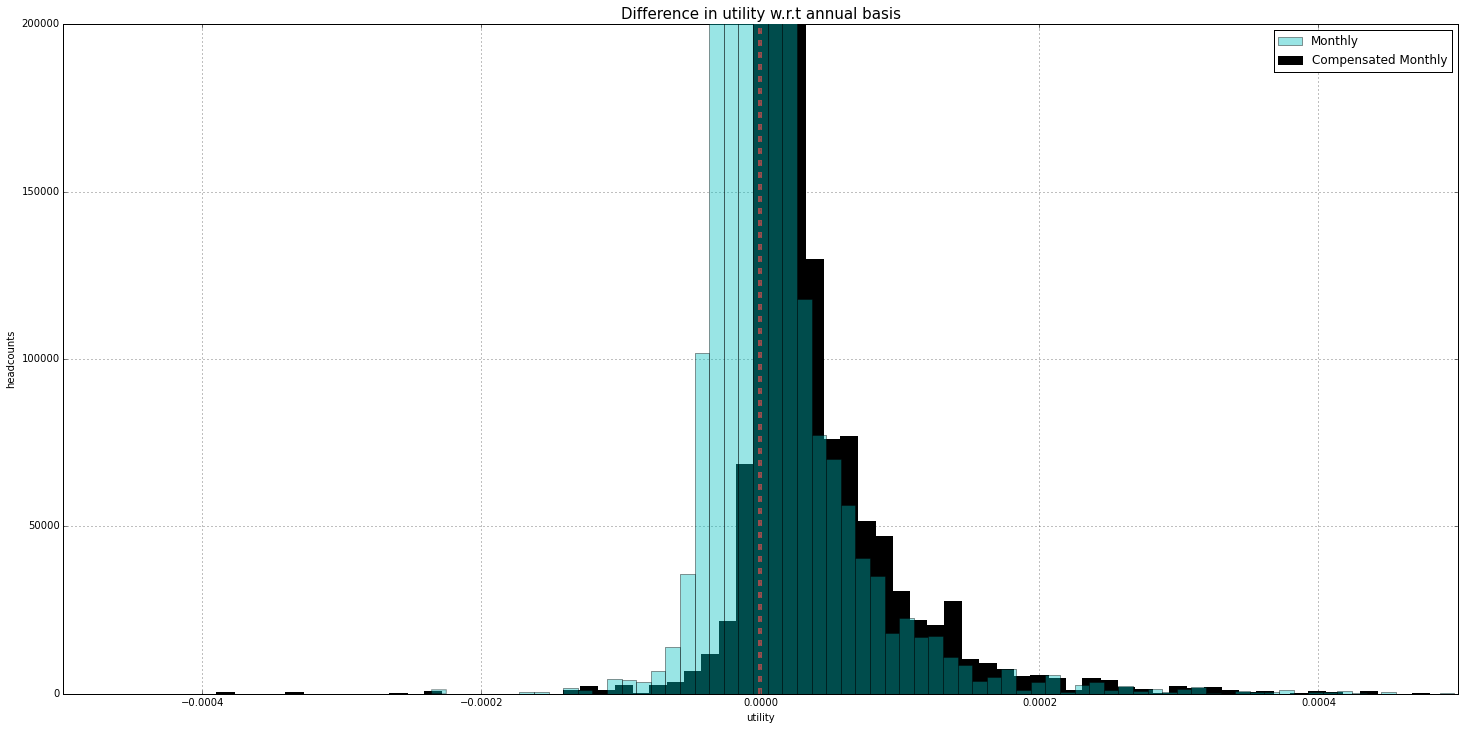

In [92]:
hist1 = ((u_ir_m - u_ir_a)).hist(bins = 200, figsize = (25,12), weights = weight_menages, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
hist2 = ((u_c_ir - u_ir_a)).hist(bins = 200, figsize = (25,12), weights = weight_menages,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
plt.ylim(0,20*10**4)
plt.xlim(-0.0005, 0.0005)
plt.legend()
plt.title("Difference in utility w.r.t annual basis", size = 15)
plt.xlabel('utility')
plt.ylabel('headcounts')

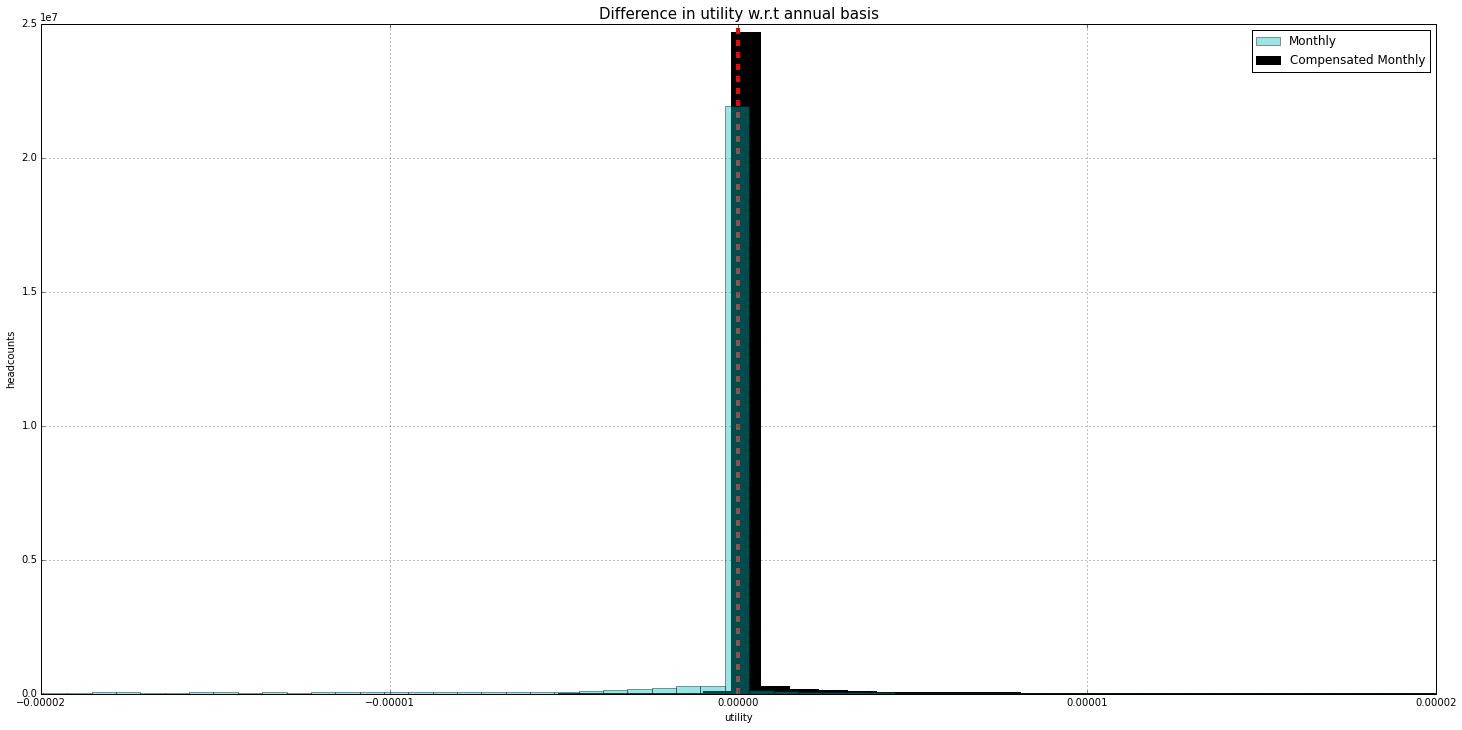

In [93]:
hist1 = ((u_ir_m - u_ir_a)).hist(bins = 3000, figsize = (25,12), weights = weight_menages, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
hist2 = ((u_c_ir - u_ir_a)).hist(bins = 3000, figsize = (25,12), weights = weight_menages,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
#plt.ylim(0,70*10**5)
plt.xlim(-0.00002, 0.00002)
plt.legend()
plt.title("Difference in utility w.r.t annual basis", size = 15)
plt.xlabel('utility')
plt.ylabel('headcounts')

In [94]:
weight_menages = pd.Series(weight_menages)

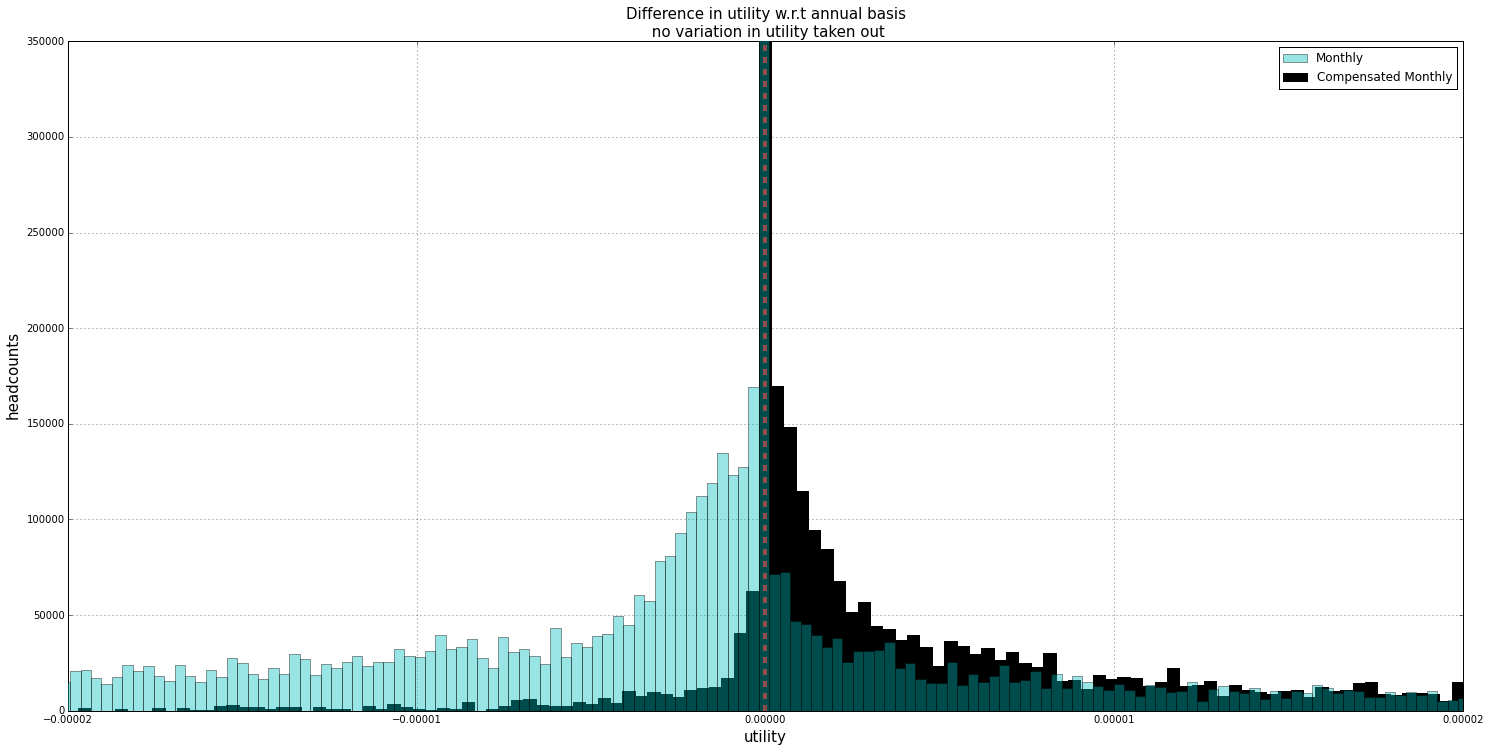

In [95]:
execute_time_consuming_graph = True
if execute_time_consuming_graph == True : 

    hist1 = ((u_ir_m - u_ir_a))[((u_ir_m - u_ir_a))!=0].hist(bins = 7000, figsize = (25,12), weights = pd.Series(weight_menages)[((u_ir_m - u_ir_a))!=0].values, zorder=10, color = 'c', alpha = 0.4, label = "Monthly")
    hist2 = ((u_c_ir - u_ir_a))[((u_c_ir - u_ir_a))!=0].hist(bins = 7000, figsize = (25,12), weights = pd.Series(weight_menages)[((u_c_ir - u_ir_a))!=0].values,zorder=1, color = 'k',alpha = 1, label = "Compensated Monthly")

    plt.axvline(x=0, ymax = 10**6, linewidth=4, color = 'r', alpha = 1, linestyle='dashed')
    plt.ylim(0,35*10**4)
    plt.xlim(-0.00002, 0.00002)
    plt.legend()
    plt.title("Difference in utility w.r.t annual basis \n no variation in utility taken out", size = 15)
    plt.xlabel('utility', size = 15)
    plt.ylabel('headcounts', size = 15)

In [96]:
outliers = pd.Series(np.abs(((u_ir_m - u_ir_a))[((u_ir_m - u_ir_a))!=0])>0.00002).value_counts(normalize = True); outliers

False    0.755526
True     0.244474
dtype: float64

In [97]:
"This graph represent {}% of the tax-unit with varying utility, {}% of that sample are over 0.0002 utility points variation".format(outliers[0], outliers[1])

'This graph represent 0.755525965379% of the tax-unit with varying utility, 0.244474034621% of that sample are over 0.0002 utility points variation'

In [98]:
pd.Series(weight_menages).shape

(49016,)

In [99]:
decote = survey_scenario.simulation.calculate('decote_menage')
decote_mensuel = survey_scenario.simulation.calculate_add('decote_mensuel_menage')

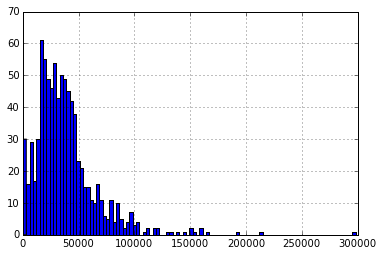

In [100]:
(pd.Series(survey_scenario.simulation.calculate_add('revdisp_mensuel_annuel'))[((u_c_ir - u_ir_a)<0)]).hist(bins = 100)

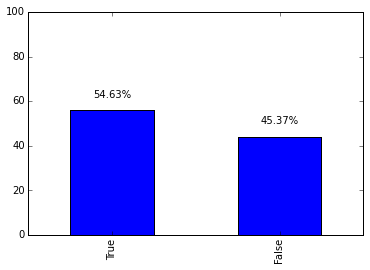

In [101]:
ax = ((pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<-0.00000001)]).value_counts( normalize = True)*100).plot(kind = "bar",)
plt.ylim((0,100))

labels = ["{}%".format(np.round(i,2)) for i in ((pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<-0.0000001)]).value_counts( normalize = True)*100) ] #0.000001 pour éviter les erreurs d'arrondis.
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

In [102]:
is_decote_different = pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<-0.00000001)]

In [103]:
#TODO for famille and check if it coorrespond to the 46.43%
below_collection_thrshld = np.zeros(weight_foyers.shape[0], dtype=bool)
for month in range(1,13):
    irpp_mensuel = pd.Series(survey_scenario.simulation.calculate("irpp_mensuel", '2009-{}'.format(month)))
    below_collection_thrshld += (irpp_mensuel>1) & (irpp_mensuel<5.16)
    

In [104]:
pd.Series(below_collection_thrshld).value_counts()

False    59386
True       488
dtype: int64

In [105]:
np.array([True, False])+np.array([True, True])

array([ True,  True], dtype=bool)

In [106]:
#Qui sont les gagnants ? :


In [107]:
is_decote_different[is_decote_different==False]

66       False
966      False
1857     False
2025     False
2414     False
2442     False
2711     False
2735     False
2781     False
2974     False
3154     False
3228     False
3638     False
3681     False
3743     False
4518     False
4540     False
4669     False
4991     False
5201     False
5214     False
5501     False
5749     False
5868     False
6044     False
6045     False
6117     False
6124     False
6393     False
6451     False
6513     False
6613     False
6664     False
6730     False
7418     False
7659     False
7847     False
8223     False
8361     False
8369     False
8547     False
8623     False
8636     False
8957     False
9231     False
9233     False
9611     False
9649     False
10051    False
10205    False
10374    False
10404    False
10541    False
10742    False
10785    False
11016    False
11104    False
11181    False
11414    False
11941    False
12326    False
12423    False
12566    False
12592    False
12678    False
12684    False
12734    F

In [108]:
pd.Series(np.abs(decote -decote_mensuel)>0.1)[((u_c_ir - u_ir_a)<0.000001)].value_counts(normalize = True)

False    0.881093
True     0.118907
dtype: float64

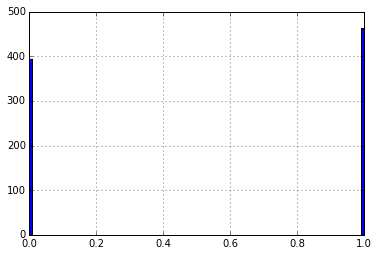

In [109]:
(pd.Series(decote!= decote_mensuel)[((u_c_ir - u_ir_a)<0)]).hist(bins = 100)

In [110]:
revdisp[(u_c_ir>=u_ir_a)]

0         37291.445312
1          5507.978027
2         32096.173828
3         48425.996094
4         82644.601562
5         42299.699219
6         13083.394531
7          8589.000000
9         42619.015625
10        36870.253906
11        32701.291016
12        56515.160156
13        55230.339844
14        47963.703125
15        25208.322266
16        26309.195312
17        27404.453125
18        25096.802734
19        22376.177734
20        15390.793945
21        15582.432617
22           21.714211
23        14518.393555
24        34851.238281
25        36709.484375
26        14823.540039
27        36647.253906
28        62947.148438
29        25729.265625
30        74289.171875
31        57203.242188
32        55345.027344
33        62706.847656
34        20414.976562
35        79607.382812
36        43084.625000
37        28143.593750
38        28436.367188
39         7462.895996
40           -0.000000
41        20206.179688
42        15152.797852
43        18625.531250
44        2

In [111]:
print u_c_ir[(decote_annual==0) & (decote_monthly==0)].mean()
print u_ir_m[(decote_annual==0) & (decote_monthly==0)].mean()
print u_ir_a[(decote_annual==0) & (decote_monthly==0)].mean()

-0.00443235
-0.00443418
-0.00443452


## Qui sont les gagnants ?

In [112]:
print pd.value_counts((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))>1)
print pd.value_counts((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))<-1)

False    40490
True      8526
dtype: int64
False    47832
True      1184
dtype: int64


In [113]:
print pd.Series(((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))>1)
                     *weight_menages).sum()
print pd.Series(((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel")-survey_scenario.simulation.calculate_add("revdisp_mensuel_ir_mensuel"))<-1)
                      *weight_menages).sum()

4762971.0
631642.0


In [114]:
np.mean(
    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")>1]
    )

12579.479

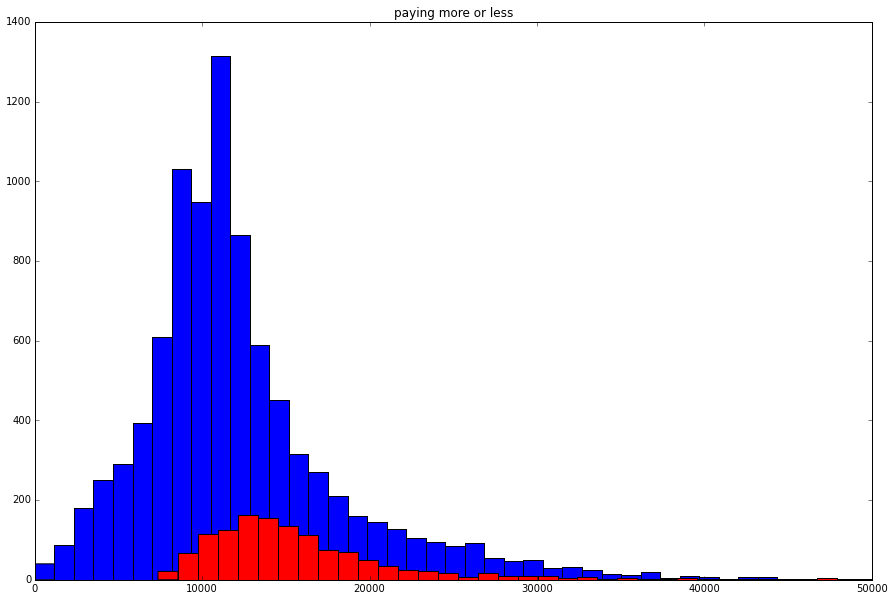

In [115]:
plt.figure(figsize=(15,10))
plt.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")>1], bins = 200, label = "Paying less on monthly basis")
plt.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")<-1], bins = 65, color= 'r', label = "Paying more on monthly basis")
plt.xlim(0,50000)
plt.title("paying more or less")

###### Weighted

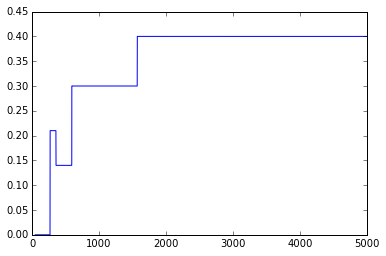

In [116]:
from openfisca_utils import make_ready_to_use_simulation
from openfisca_core import rates
simulation = make_ready_to_use_simulation.make_ready_to_use_simulation(2009,False)
rbg_test_case = simulation.calculate('rbg')
irpp_test_case = simulation.calculate('irpp')
marginal_rate = rates.marginal_rate(irpp_test_case, rbg_test_case)-1
to_change = pd.Series(marginal_rate)[marginal_rate>1].index
#to_change = pd.Series(rates.marginal_rate(irpp_test_case, rbg_test_case)-1)[rates.marginal_rate(irpp_test_case, rbg_test_case)-1>1].index
marginal_rate[to_change] = marginal_rate[to_change+1]
plt.plot(marginal_rate)

In [117]:
to_change = pd.Series(rates.marginal_rate(irpp_test_case, rbg_test_case)-1)[rates.marginal_rate(irpp_test_case, rbg_test_case)-1>1].index


In [118]:
pd.Series(marginal_rate)[marginal_rate>1]

Series([], dtype: float32)

In [119]:
np.mean(survey_scenario.simulation.calculate("rbg"))

23384.496

In [120]:
np.array([True,True,False]) *np.array([2,3,4])

array([2, 3, 0])

In [121]:
pd.value_counts((survey_scenario.simulation.calculate_add("revdisp_mensuel_annuel") - survey_scenario.simulation.calculate_add("revdisp_mensuel_compensated_ir_mensuel")>1))

False    48406
True       610
dtype: int64

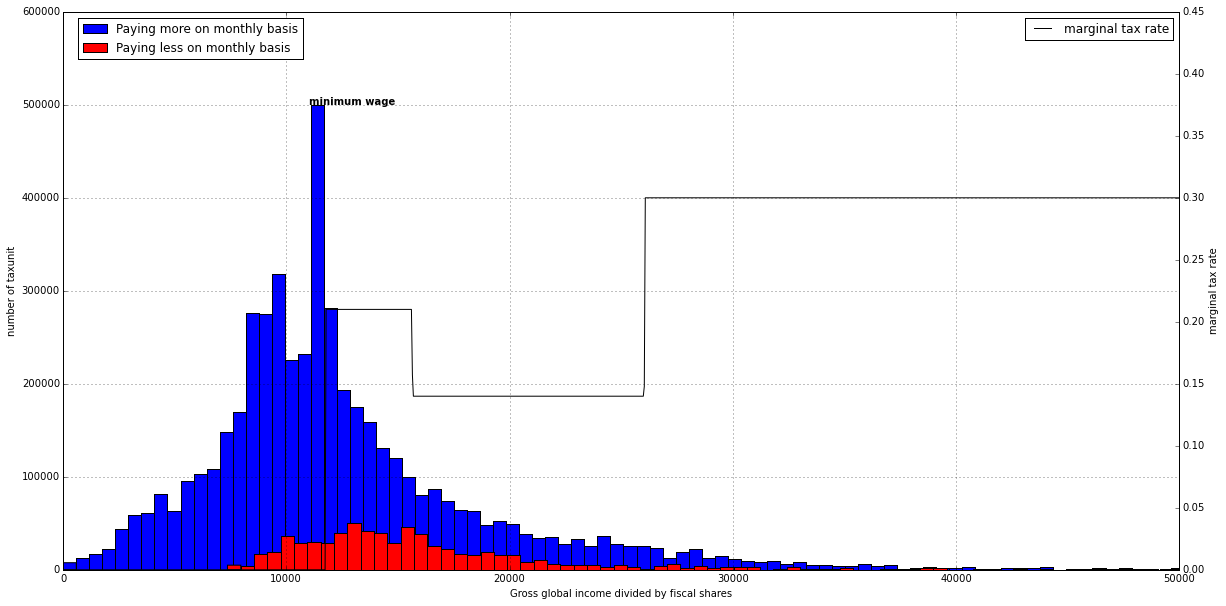

In [705]:


weights1 = weight_foyers[survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")>1]
weights2 = weight_foyers[survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel")<-1]

fig, ax1 = plt.subplots(figsize=(20, 10))


ax1.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [(survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel"))>1], bins = 400, label = "Paying more on monthly basis", weights= weights1)
ax1.hist(    (survey_scenario.simulation.calculate("rbg")/survey_scenario.simulation.calculate("nbptr"))\
    [(survey_scenario.simulation.calculate_add("irpp")-survey_scenario.simulation.calculate_add("irpp_mensuel"))<-1], bins = 130, color= 'r', label = "Paying less on monthly basis",weights= weights2)


ax1.set_xlim(0,50000)
ax2 = plt.twinx()
ax2.plot(rbg_test_case[1:],marginal_rate, 'k', label = "marginal tax rate")
ax2.set_xlim(0,50000)
ax2.legend()
ax1.legend(bbox_to_anchor=(0.22, 1))
ax1.grid(which = 'both')
ax1.text(11000,500000, u"minimum wage", weight = 'bold',)
ax2.set_ylabel("marginal tax rate")
ax1.set_xlabel("Gross global income divided by fiscal shares")
ax1.set_ylabel("number of taxunit")
#plt.title("")


In [704]:
-(100 -  110)

10

In [696]:
survey_scenario.simulation.calculate_add("irpp_mensuel").mean()

-1639.9276

### Gains monetaires

#### Same annalysis with benefits

In [123]:
survey_scenario.compute_aggregate("rsa_socle_majore_mensualise")

728384235.46594238

In [124]:
survey_scenario.compute_aggregate("rsa_non_majore")

23353404961.199886

In [125]:
pd.Series(survey_scenario.simulation.calculate("rsa_eligibilite_tns", "2009-01")).value_counts()

True    55306
dtype: int64

# Utilitarian monetary gains

In [126]:
monetary_gain_ir = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    monetary_gain_ir += (
    survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )*weight_menages

In [127]:
((monetary_gain_ir.sum(0)/10)*12)/10**9

1.2469275961916018

Gains moyens par ménages.

(-10000, 10000)

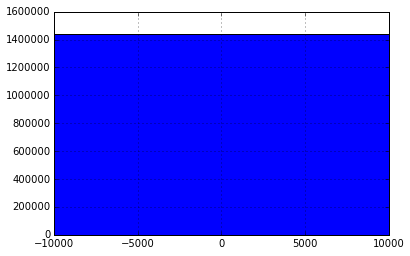

In [128]:
monetary_gain_ir = pd.Series(monetary_gain_ir)
monetary_gains_ir_0 = monetary_gain_ir[monetary_gain_ir != 0]
monetary_gains_ir_0.hist(bins = 500, weights = (pd.Series(weight_menages)[monetary_gain_ir != 0]).values)
plt.xlim(-10000,10000)

In [129]:
print pd.Series(monetary_gain_ir<-10).value_counts()
print pd.Series(monetary_gain_ir>10).value_counts()
pd.Series(monetary_gain_ir)[monetary_gain_ir>10]

False    46890
True      2126
dtype: int64
False    45866
True      3150
dtype: int64


5        1173541.649414
10       1047751.408203
16        409220.786133
49        242613.076172
52        384541.716797
55         32641.109375
65        452650.601074
82         20444.409180
93        131791.562500
100        74382.394531
124        24030.738281
159        13964.397461
173         4284.328125
184       112973.917969
199        11421.210938
211      1013390.912109
231       671387.926758
236        82846.258301
245        11618.085938
269        82758.820312
284      2964050.640625
287       130724.507812
320          246.052734
324         1366.541016
340        41477.932617
353       665549.296875
363        84518.494629
375       540423.499512
418       319564.669922
429        49490.314453
432        40239.096680
455        44139.335938
460       158157.739258
469       135137.460938
470       328638.652344
472       106191.083984
474       339132.326660
515      2842379.068359
518       281320.620117
522       366207.828125
546       982508.621094
574       118250

In [130]:
month = 7
gain = pd.Series(survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )
gain[np.abs(gain)>1].mean()


33.118782

In [131]:
 diff_in_income = pd.Series(
    np.abs(survey_scenario.simulation.calculate("revdisp_mensuel_annuel", "2009-{}".format(month))
          - survey_scenario.simulation.calculate("revdisp_mensuel_compensated_ir_mensuel", "2009-{}".format(month)))>1
    )

In [132]:
weight_menages.sum(0)

27299608.0

In [134]:
#monetary_gain.sum(0)/10**9

#### Non compensated

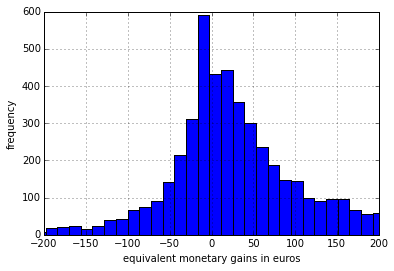

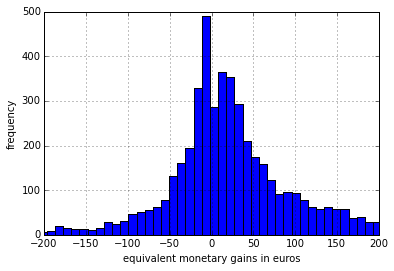

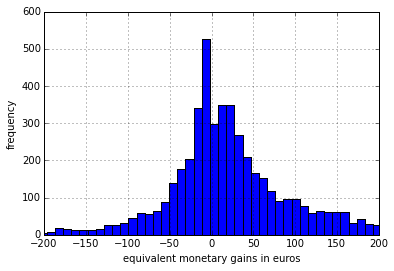

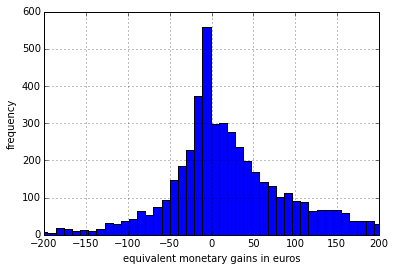

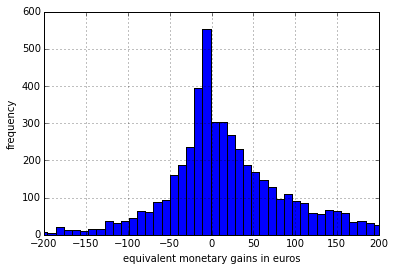

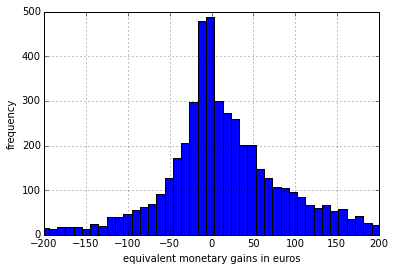

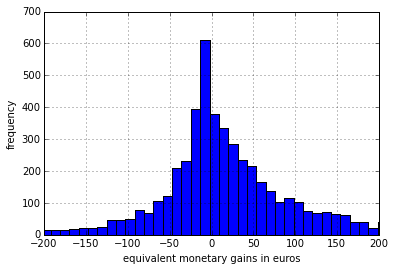

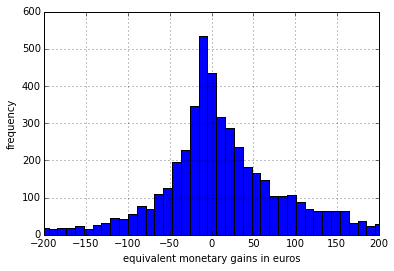

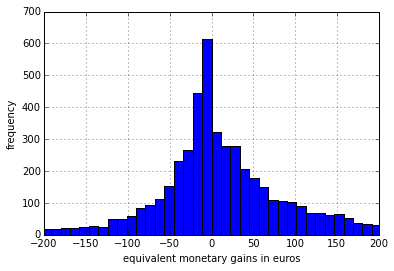

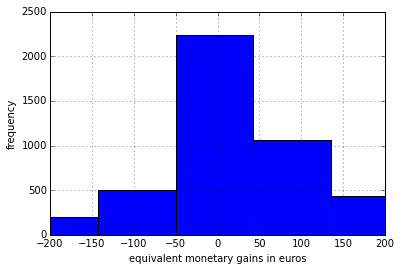

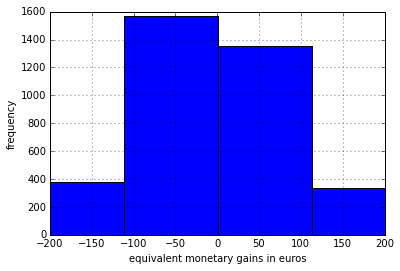

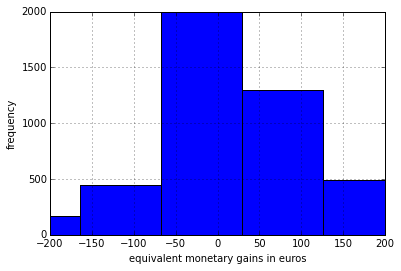

In [135]:
for month in range(1,13):
    gain_u = (pd.Series(
     survey_scenario.simulation.calculate("utility_ir_mensuel", "2009-{}".format(month)) - 
survey_scenario.simulation.calculate("utility_ir_annuel", "2009-{}".format(month))
        ))
    gain_m =  (
        survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
        survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))
    pd.DataFrame({'gain_utilite':gain_u, 'gain_argent':gain_m})
    plt.figure()
    pd.Series(gain_m)[gain_m!=0].hist(bins = 1500)
    plt.xlim(-200,200)
    plt.xlabel("equivalent monetary gains in euros ")
    plt.ylabel('frequency')
#TODO: problème sur les 3 derniers mois !

In [136]:
u_monetary_gain_ir = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    u_monetary_gain_ir += (
    survey_scenario.simulation.calculate("inverted_utility_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )*weight_menages

In [137]:
((u_monetary_gain_ir.sum(0)/10)*12)/10**9

-0.20371621034941409

In [138]:
u_monetary_gain_ir = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    u_monetary_gain_ir += np.mean(
    (survey_scenario.simulation.calculate("inverted_utility_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))*weight_menages
    )

In [139]:
((u_monetary_gain_ir.sum(0)/10)*12)/10**9

-0.20371621034941398

In [140]:
month = 7
gain = pd.Series(survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )
mean_gain = gain[np.abs(gain)>1].mean()
print('{} gain on average'.format(mean_gain))

33.1187820435 gain on average


In [141]:
u_monetary_gain = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    u_monetary_gain +=np.mean(
        pd.Series(survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
        survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))
               )
(((u_monetary_gain_ir/10)*12)/10**9).mean()  

-4.1561165813084291e-06

#### Compensated

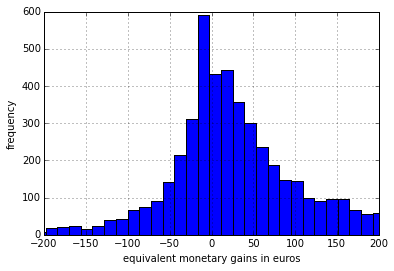

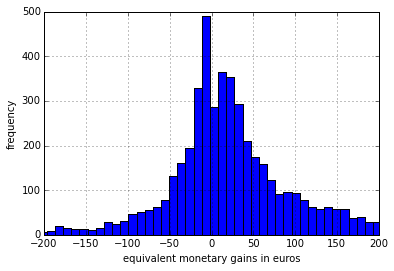

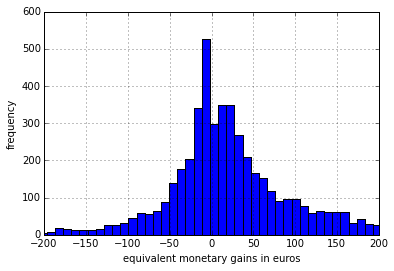

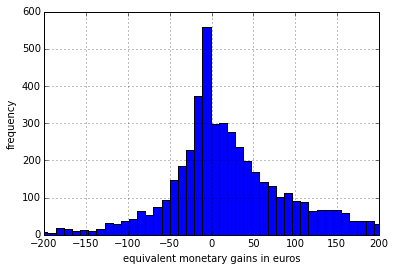

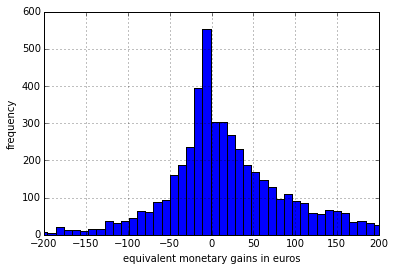

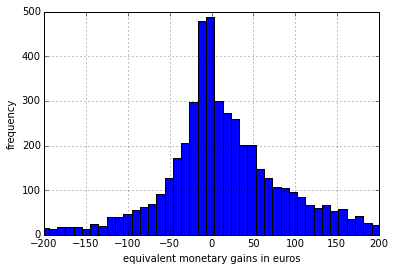

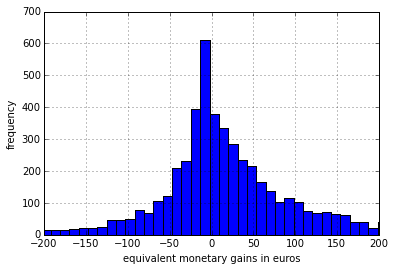

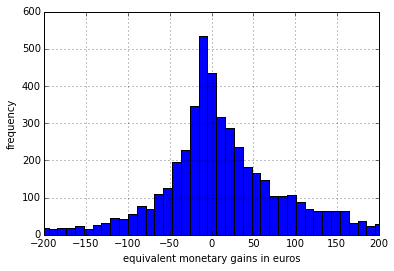

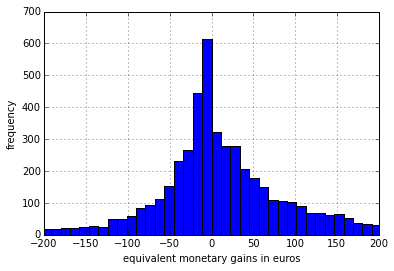

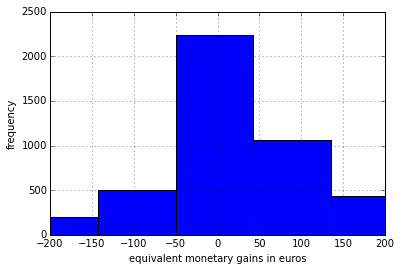

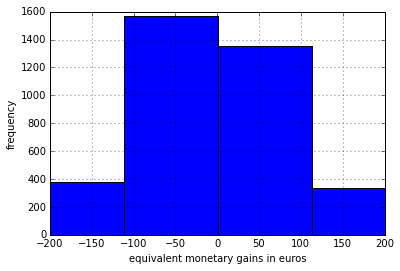

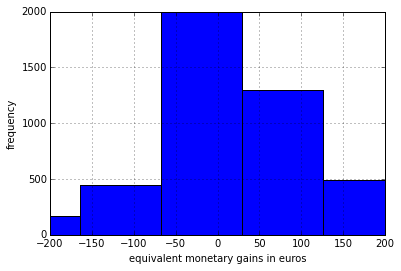

In [142]:
for month in range(1,13):
    gain_u = (pd.Series(
     survey_scenario.simulation.calculate("utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
survey_scenario.simulation.calculate("utility_ir_annuel", "2009-{}".format(month))
        ))
    gain_m =  (
        survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel", "2009-{}".format(month)) - 
        survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))
    pd.DataFrame({'gain_utilite':gain_u, 'gain_argent':gain_m})
    plt.figure()
    pd.Series(gain_m)[gain_m!=0].hist(bins = 1500)
    plt.xlim(-200,200)
    plt.xlabel("equivalent monetary gains in euros ")
    plt.ylabel('frequency')
#TODO: problème sur les 3 derniers mois !

### RSA+IR

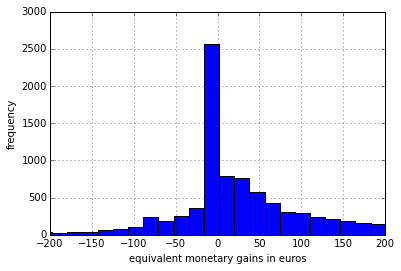

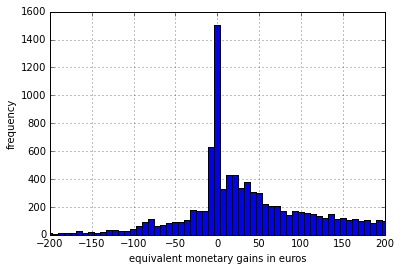

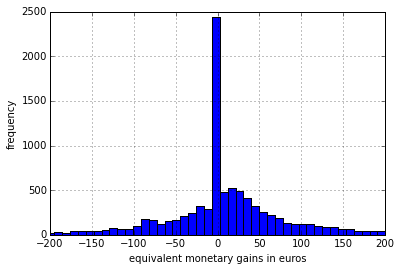

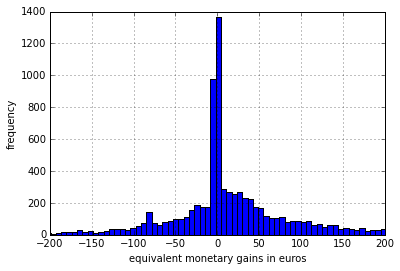

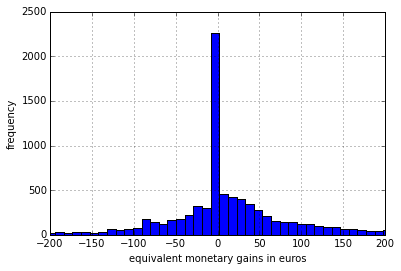

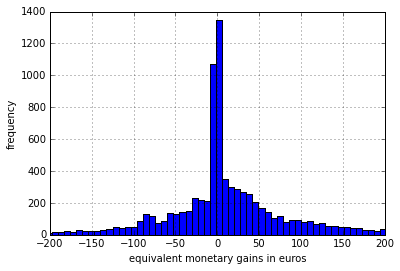

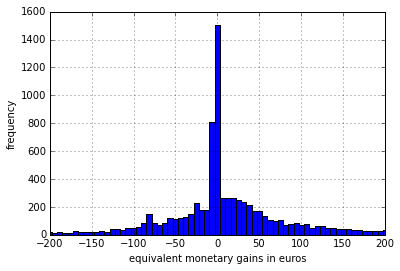

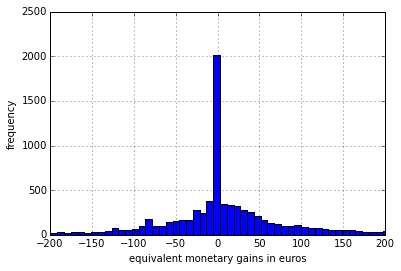

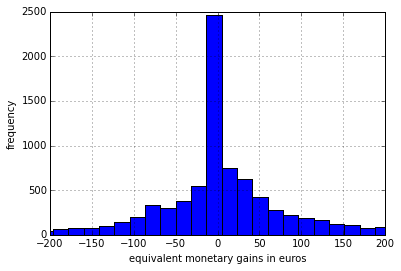

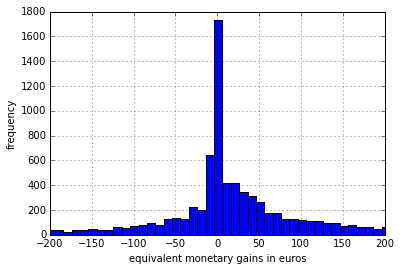

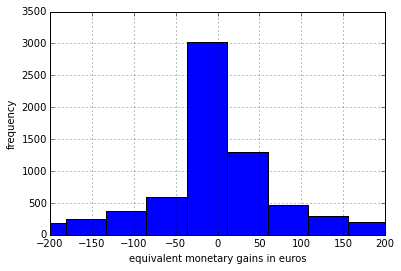

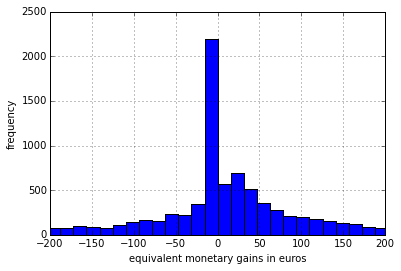

In [143]:
for month in range(1,13):
    gain_u = (pd.Series(
     survey_scenario.simulation.calculate("utility_ir_mensuel_rsa_mensuel", "2009-{}".format(month)) - 
survey_scenario.simulation.calculate("utility_ir_annuel", "2009-{}".format(month))
        ))
    gain_m =  (
        survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel_rsa_mensuel", "2009-{}".format(month)) - 
        survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month)))
    pd.DataFrame({'gain_utilite':gain_u, 'gain_argent':gain_m})
    plt.figure()
    pd.Series(gain_m)[gain_m!=0].hist(bins = 1500)
    plt.xlim(-200,200)
    plt.xlabel("equivalent monetary gains in euros ")
    plt.ylabel('frequency')
#TODO: problème sur les 3 derniers mois !

In [144]:
monetary_gain_ir_rsa = np.zeros(weight_menages.shape[0])
for month in range(1,10):
    monetary_gain_ir_rsa += (
    survey_scenario.simulation.calculate("inverted_utility_compensated_ir_mensuel_rsa_mensuel", "2009-{}".format(month)) - 
    survey_scenario.simulation.calculate("inverted_utility_ir_annuel", "2009-{}".format(month))
    )*weight_menages

In [145]:
((monetary_gain_ir_rsa.sum(0)/10)*12)/10**9

4.8599022782765617

## Gains et perte passage à la retraite.

In [540]:
print survey_scenario.simulation.persons.simulation.entity_by_key_plural

{'foyers_fiscaux': <openfisca_core.reforms.FoyersFiscaux object at 0x10b119510>, 'individus': <openfisca_core.reforms.Individus object at 0x10b19dfd0>, 'familles': <openfisca_core.reforms.Familles object at 0x10b119850>, 'menages': <openfisca_core.reforms.Menages object at 0x10b19d710>}


In [559]:
coucou.entity.simulation

In [591]:
c = np.zeros(1)
a = np.array([1,2,3])
b = np.array([True,True,False])
c += a[b]; c

ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (2,)

In [508]:
is_retired = np.zeros(weight_individus.shape[0])
is_active = np.zeros(weight_individus.shape[0])
is_inactive = np.zeros(weight_individus.shape[0])
for month in range(1,13):
    is_retired += survey_scenario.simulation.calculate("retraite_imposable", "2009-{}".format(month))>0
    is_active += survey_scenario.simulation.calculate("salaire_imposable", "2009-{}".format(month))>0
    is_inactive += (survey_scenario.simulation.calculate("salaire_imposable", "2009-{}".format(month)) + survey_scenario.simulation.calculate("retraite_imposable", "2009-{}".format(month))) == 0

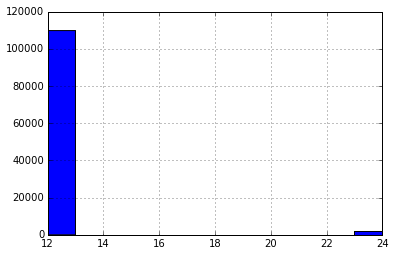

In [510]:
(pd.Series(is_retired + is_active + is_inactive).hist(bins= 12))

In [521]:
is_retired = np.zeros(weight_individus.shape[0])
is_active = np.zeros(weight_individus.shape[0])
is_inactive = np.zeros(weight_individus.shape[0])
is_retire_active = np.zeros(weight_individus.shape[0])

for month in range(1,13):
    retraite_imposable = survey_scenario.simulation.compute("retraite_imposable", "2009-{}".format(month))
    salaire_imposable = survey_scenario.simulation.compute("salaire_imposable", "2009-{}".format(month))
    is_retired += retraite_imposable.array >0
    is_active += salaire_imposable.array > 0 
    is_retire_active += (retraite_imposable.array >0) & (salaire_imposable.array > 0 )
    is_inactive += (retraite_imposable.array == 0) & (salaire_imposable.array == 0 )
    

In [532]:
is_retire_is_active_not_retire_active = ((is_retire_active == 0)
                                         & (is_active>0)
                                         & (is_inactive >0)
                                         )

In [533]:
survey_scenario.simulation.tax_benefit_system.Variable.formula_class.sum_by_entity(retraite_imposable)

TypeError: unbound method sum_by_entity() must be called with SimpleFormula instance as first argument (got DatedHolder instance instead)

In [534]:
survey_scenario.simulation.tax_benefit_system.Variable.formula_class.sum_by_entity('h')

TypeError: unbound method sum_by_entity() must be called with SimpleFormula instance as first argument (got str instance instead)

In [ ]:
 type(class_name.encode('utf-8'), (Reform.DatedVariable,), definitions_by_name)

In [531]:
pd.Series(is_retire_is_active_not_retire_active).value_counts()

False    105932
True       6427
dtype: int64

In [512]:
(pd.Series(is_retired + is_active + is_inactive)).value_counts()

12    109799
24      2182
13       134
21        78
15        47
22        22
18        19
23        18
17        15
20        13
16        12
14        12
19         8
dtype: int64

In [494]:
passage_a_la_retraite = pd.Series(is_retired) & pd.Series(is_not_retired)

TypeError: unsupported operand type(s) for &: 'float' and 'bool'

## Revdisp over the year

## Annual IR Basis

In [469]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel', 'psoc_mensuel', 'ppe']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))))
    temp['impo'] = pd.Series(np.sum(survey_scenario.simulation.calculate('impo', "2009".format(month))))/12
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy

,salaire_imposable,chomage_imposable,pen_mensuel,psoc_mensuel,ppe,impo,rev_cap
1,80446056,3401369.75,27179322,10032782.0,388890.5625,-7378242.666667,146923.083333
2,80205280,3339581.25,27200762,6804533.5,388890.5625,-7378242.666667,146923.083333
3,80154912,3433212.50,27403234,9449735.0,388890.5625,-7378242.666667,146923.083333
4,80183488,3356610.50,27280964,10069107.0,388890.5625,-7378242.666667,146923.083333
5,80182728,3462323.00,27561876,7646847.0,388890.5625,-7378242.666667,146923.083333
6,80186344,3621052.50,27925554,7603293.0,388890.5625,-7378242.666667,146923.083333
7,80155752,3779776.50,28094176,7606154.0,388890.5625,-7378242.666667,146923.083333
8,80345952,3978757.75,28543968,7525756.5,388890.5625,-7378242.666667,146923.083333
9,80677472,4363786.00,29311400,7476102.0,388890.5625,-7378242.666667,146923.083333
10,81388208,4971175.00,28707408,7832963.0,388890.5625,-7378242.666667,146923.083333


#### With weight

In [470]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel',]:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_individus))
    for var in ['psoc_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_familles))      
    temp['impo'] = pd.Series(np.sum(survey_scenario.simulation.calculate('impo', "2009".format(month))* weight_menages))/12
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
    

revdisp_oy.index = range(1,13)
revdisp_oy/10**9

,salaire_imposable,chomage_imposable,pen_mensuel,psoc_mensuel,impo,rev_cap,total
1,46.035288,1.988781,12.544919,5.331607,-4.00459,0.000147,61.896151
2,45.911349,1.966999,12.577170,3.517861,-4.00459,0.000147,59.968936
3,45.915476,2.084441,12.740929,5.004243,-4.00459,0.000147,61.740645
4,45.947659,1.934130,12.562599,5.422800,-4.00459,0.000147,61.862745
5,45.926885,1.995026,12.733947,4.045746,-4.00459,0.000147,60.697161
6,45.875387,2.120168,12.955677,4.024281,-4.00459,0.000147,60.971069
7,45.898869,2.211393,13.022996,4.036098,-4.00459,0.000147,61.164912
8,45.964801,2.337075,13.255434,3.989299,-4.00459,0.000147,61.542166
9,46.157049,2.538842,13.616544,3.963893,-4.00459,0.000147,62.271885
10,46.501451,2.785263,13.339886,4.135864,-4.00459,0.000147,62.758021


In [471]:
print (revdisp_oy/10**9).to_latex()

\begin{tabular}{lrrrrrrr}
\toprule
{} &  salaire\_imposable &  chomage\_imposable &  pen\_mensuel &  psoc\_mensuel &     impo &   rev\_cap &      total \\
\midrule
1  &          46.035288 &           1.988781 &    12.544919 &      5.331607 & -4.00459 &  0.000147 &  61.896151 \\
2  &          45.911349 &           1.966999 &    12.577170 &      3.517861 & -4.00459 &  0.000147 &  59.968936 \\
3  &          45.915476 &           2.084441 &    12.740929 &      5.004243 & -4.00459 &  0.000147 &  61.740645 \\
4  &          45.947659 &           1.934130 &    12.562599 &      5.422800 & -4.00459 &  0.000147 &  61.862745 \\
5  &          45.926885 &           1.995026 &    12.733947 &      4.045746 & -4.00459 &  0.000147 &  60.697161 \\
6  &          45.875387 &           2.120168 &    12.955677 &      4.024281 & -4.00459 &  0.000147 &  60.971069 \\
7  &          45.898869 &           2.211393 &    13.022996 &      4.036098 & -4.00459 &  0.000147 &  61.164912 \\
8  &          45.964801 &      

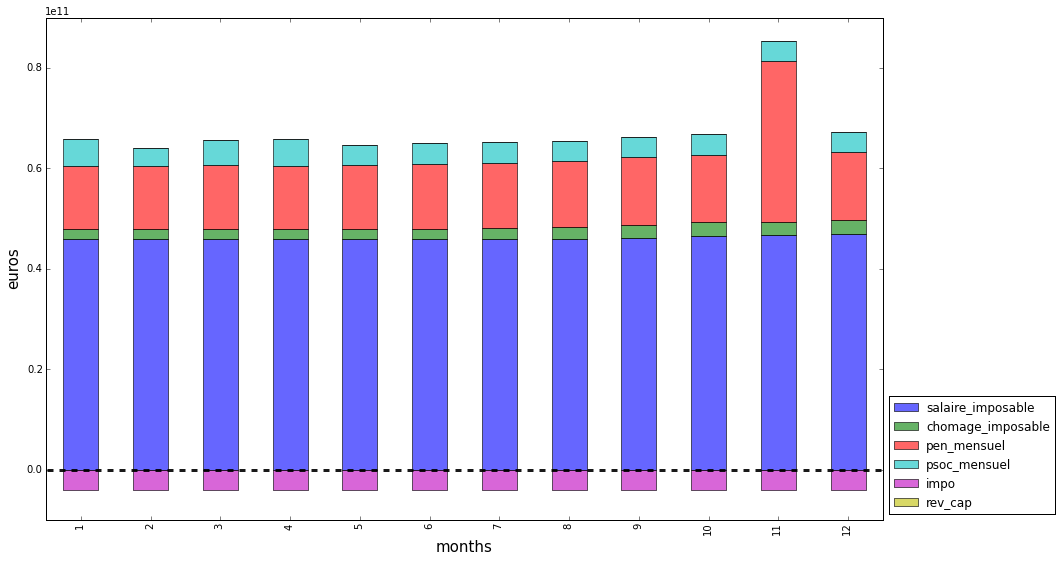

In [453]:
ax = revdisp_oy.plot(kind = 'bar', stacked = 'True',alpha = 0.6, figsize=(15,9) )
#ax = fig.add_subplot(111)

plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.9)

plt.xlabel("months", fontsize = 15)
plt.ylabel("euros", fontsize = 15)
plt.legend( bbox_to_anchor=(1, 0, 1, 1), loc=3,)
plt.savefig("image_result_of_mensualisation/revdisp_ir_annual.png")

## Monthly Basis

In [454]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel', 'psoc_mensuel', 'ppe']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))))
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('impo_mensuel', "2009-{}".format(month))))
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy

,salaire_imposable,chomage_imposable,pen_mensuel,psoc_mensuel,ppe,impo_mensuel,rev_cap
1,80446056,3401369.75,27179322,10032782.0,388890.5625,-7408676.0,146923.083333
2,80205280,3339581.25,27200762,6804533.5,388890.5625,-7329735.0,146923.083333
3,80154912,3433212.50,27403234,9449735.0,388890.5625,-7325580.5,146923.083333
4,80183488,3356610.50,27280964,10069107.0,388890.5625,-7274350.0,146923.083333
5,80182728,3462323.00,27561876,7646847.0,388890.5625,-7300716.0,146923.083333
6,80186344,3621052.50,27925554,7603293.0,388890.5625,-7338248.5,146923.083333
7,80155752,3779776.50,28094176,7606154.0,388890.5625,-7343551.0,146923.083333
8,80345952,3978757.75,28543968,7525756.5,388890.5625,-7431710.5,146923.083333
9,80677472,4363786.00,29311400,7476102.0,388890.5625,-7630362.0,146923.083333
10,81388208,4971175.00,28707408,7832963.0,388890.5625,-7750895.5,146923.083333


### With weight

In [472]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_individus))
    for var in ['psoc_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_familles))      
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('impo_mensuel', "2009-{}".format(month))* weight_menages))
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))*weight_individus))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)

revdisp_oy.index = range(1,13)
revdisp_oy/10**9

,salaire_imposable,chomage_imposable,pen_mensuel,psoc_mensuel,impo_mensuel,rev_cap
1,46.035288,1.988781,12.544919,5.331607,-4.020145,0.081308
2,45.911349,1.966999,12.577170,3.517861,-3.978615,0.081308
3,45.915476,2.084441,12.740929,5.004243,-3.998558,0.081308
4,45.947659,1.934130,12.562599,5.422800,-3.946852,0.081308
5,45.926885,1.995026,12.733947,4.045746,-3.962323,0.081308
6,45.875387,2.120168,12.955677,4.024281,-3.982285,0.081308
7,45.898869,2.211393,13.022996,4.036098,-3.983082,0.081308
8,45.964801,2.337075,13.255434,3.989299,-4.028641,0.081308
9,46.157049,2.538842,13.616544,3.963893,-4.125633,0.081308
10,46.501451,2.785263,13.339886,4.135864,-4.186188,0.081308


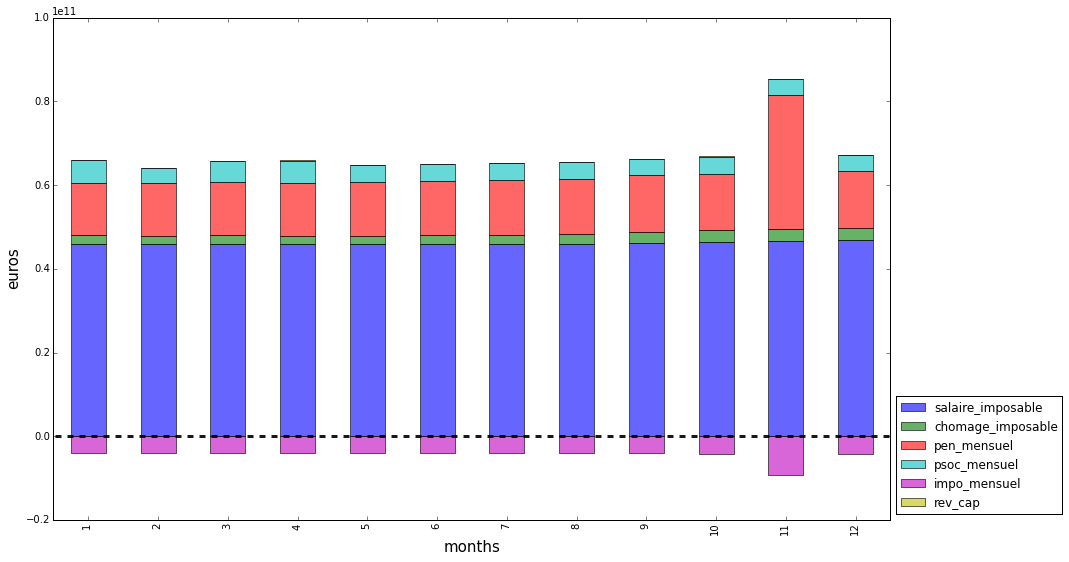

In [473]:
ax = revdisp_oy.plot(kind = 'bar', stacked = 'True',alpha = 0.6, figsize=(15,9) )
#ax = fig.add_subplot(111)

plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.9)

plt.xlabel("months", fontsize = 15)
plt.ylabel("euros", fontsize = 15)
plt.legend( bbox_to_anchor=(1, 0, 1, 1), loc=3,)
plt.savefig("image_result_of_mensualisation/revdisp_ir_monthly.png")

In [474]:
revdisp_oy['total'] = revdisp_oy.sum(1)
print (revdisp_oy/10**9).to_latex()

\begin{tabular}{lrrrrrrr}
\toprule
{} &  salaire\_imposable &  chomage\_imposable &  pen\_mensuel &  psoc\_mensuel &  impo\_mensuel &   rev\_cap &      total \\
\midrule
1  &          46.035288 &           1.988781 &    12.544919 &      5.331607 &     -4.020145 &  0.081308 &  61.961759 \\
2  &          45.911349 &           1.966999 &    12.577170 &      3.517861 &     -3.978615 &  0.081308 &  60.076072 \\
3  &          45.915476 &           2.084441 &    12.740929 &      5.004243 &     -3.998558 &  0.081308 &  61.827839 \\
4  &          45.947659 &           1.934130 &    12.562599 &      5.422800 &     -3.946852 &  0.081308 &  62.001645 \\
5  &          45.926885 &           1.995026 &    12.733947 &      4.045746 &     -3.962323 &  0.081308 &  60.820590 \\
6  &          45.875387 &           2.120168 &    12.955677 &      4.024281 &     -3.982285 &  0.081308 &  61.074536 \\
7  &          45.898869 &           2.211393 &    13.022996 &      4.036098 &     -3.983082 &  0.081308 &  61.

## Compensated Monthly Basis

In [475]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel', 'psoc_mensuel', 'ppe']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))))
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('compensated_impo_mensuel', "2009-{}".format(month))))
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy

,salaire_imposable,chomage_imposable,pen_mensuel,psoc_mensuel,ppe,impo_mensuel,rev_cap
1,80446056,3401369.75,27179322,10032782.0,388890.5625,-7249542.0,146923.083333
2,80205280,3339581.25,27200762,6804533.5,388890.5625,-7241560.0,146923.083333
3,80154912,3433212.50,27403234,9449735.0,388890.5625,-7237922.0,146923.083333
4,80183488,3356610.50,27280964,10069107.0,388890.5625,-7229593.5,146923.083333
5,80182728,3462323.00,27561876,7646847.0,388890.5625,-7243841.0,146923.083333
6,80186344,3621052.50,27925554,7603293.0,388890.5625,-7266933.0,146923.083333
7,80155752,3779776.50,28094176,7606154.0,388890.5625,-7254606.0,146923.083333
8,80345952,3978757.75,28543968,7525756.5,388890.5625,-7287212.0,146923.083333
9,80677472,4363786.00,29311400,7476102.0,388890.5625,-7345476.0,146923.083333
10,81388208,4971175.00,28707408,7832963.0,388890.5625,-7191632.0,146923.083333


### With weight

In [476]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_individus))
    for var in ['psoc_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_familles))      
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('compensated_impo_mensuel', "2009-{}".format(month))* weight_menages))
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))*weight_individus))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy/10**9

,salaire_imposable,chomage_imposable,pen_mensuel,psoc_mensuel,impo_mensuel,rev_cap
1,46.035288,1.988781,12.544919,5.331607,-3.929586,0.081308
2,45.911349,1.966999,12.577170,3.517861,-3.928374,0.081308
3,45.915476,2.084441,12.740929,5.004243,-3.923851,0.081308
4,45.947659,1.934130,12.562599,5.422800,-3.925586,0.081308
5,45.926885,1.995026,12.733947,4.045746,-3.930659,0.081308
6,45.875387,2.120168,12.955677,4.024281,-3.943819,0.081308
7,45.898869,2.211393,13.022996,4.036098,-3.904758,0.081308
8,45.964801,2.337075,13.255434,3.989299,-3.920322,0.081308
9,46.157049,2.538842,13.616544,3.963893,-3.952375,0.081308
10,46.501451,2.785263,13.339886,4.135864,-3.863231,0.081308


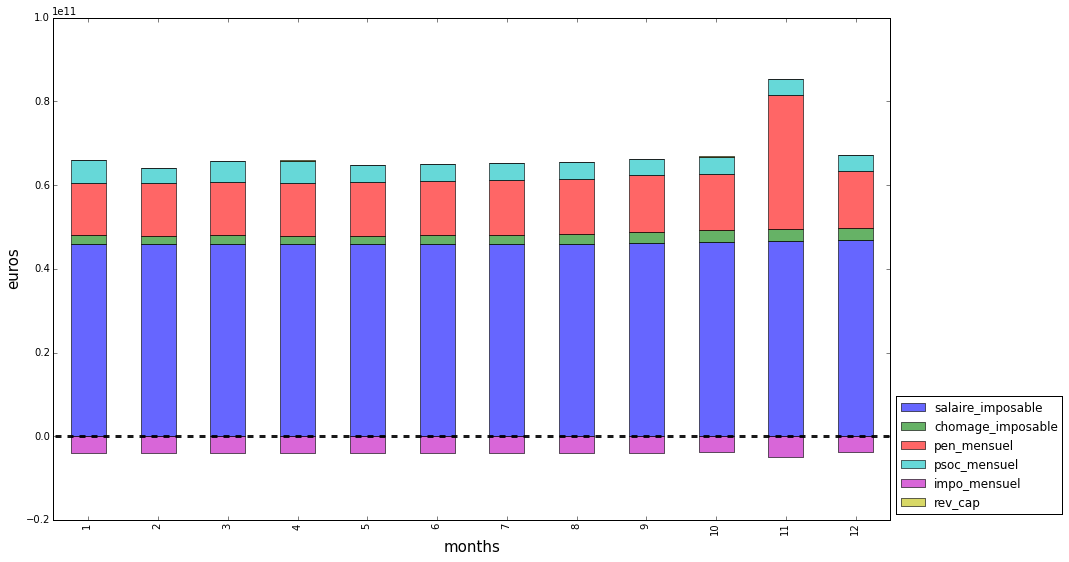

In [477]:
ax = revdisp_oy.plot(kind = 'bar', stacked = 'True',alpha = 0.6, figsize=(15,9) )
#ax = fig.add_subplot(111)

plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.9)

plt.xlabel("months", fontsize = 15)
plt.ylabel("euros", fontsize = 15)
plt.legend( bbox_to_anchor=(1, 0, 1, 1), loc=3,)
plt.savefig("image_result_of_mensualisation/revdisp_ir_comp_monthly.png")

In [478]:
revdisp_oy['total'] = revdisp_oy.sum(1)
print (revdisp_oy/10**9).to_latex()

\begin{tabular}{lrrrrrrr}
\toprule
{} &  salaire\_imposable &  chomage\_imposable &  pen\_mensuel &  psoc\_mensuel &  impo\_mensuel &   rev\_cap &      total \\
\midrule
1  &          46.035288 &           1.988781 &    12.544919 &      5.331607 &     -3.929586 &  0.081308 &  62.052318 \\
2  &          45.911349 &           1.966999 &    12.577170 &      3.517861 &     -3.928374 &  0.081308 &  60.126313 \\
3  &          45.915476 &           2.084441 &    12.740929 &      5.004243 &     -3.923851 &  0.081308 &  61.902546 \\
4  &          45.947659 &           1.934130 &    12.562599 &      5.422800 &     -3.925586 &  0.081308 &  62.022911 \\
5  &          45.926885 &           1.995026 &    12.733947 &      4.045746 &     -3.930659 &  0.081308 &  60.852254 \\
6  &          45.875387 &           2.120168 &    12.955677 &      4.024281 &     -3.943819 &  0.081308 &  61.113002 \\
7  &          45.898869 &           2.211393 &    13.022996 &      4.036098 &     -3.904758 &  0.081308 &  61.

## Compensated Rsa monthly

In [479]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel', 'psoc_mensuel_rsa_mensuel', 'ppe']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))))
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('compensated_impo_mensuel', "2009-{}".format(month))))
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy

,salaire_imposable,chomage_imposable,pen_mensuel,psoc_mensuel_rsa_mensuel,ppe,impo_mensuel,rev_cap
1,80446056,3401369.75,27179322,10741330.0,388890.5625,-7249542.0,146923.083333
2,80205280,3339581.25,27200762,9398296.0,388890.5625,-7241560.0,146923.083333
3,80154912,3433212.50,27403234,9586624.0,388890.5625,-7237922.0,146923.083333
4,80183488,3356610.50,27280964,10433773.0,388890.5625,-7229593.5,146923.083333
5,80182728,3462323.00,27561876,7995579.5,388890.5625,-7243841.0,146923.083333
6,80186344,3621052.50,27925554,7960077.5,388890.5625,-7266933.0,146923.083333
7,80155752,3779776.50,28094176,8019007.5,388890.5625,-7254606.0,146923.083333
8,80345952,3978757.75,28543968,8024409.0,388890.5625,-7287212.0,146923.083333
9,80677472,4363786.00,29311400,8079371.5,388890.5625,-7345476.0,146923.083333
10,81388208,4971175.00,28707408,9301507.0,388890.5625,-7191632.0,146923.083333


### With weight

In [480]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_individus))
    for var in ['psoc_mensuel_rsa_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_familles))      
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('compensated_impo_mensuel', "2009-{}".format(month))* weight_menages))
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))*weight_individus))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy/10**9

,salaire_imposable,chomage_imposable,pen_mensuel,psoc_mensuel_rsa_mensuel,impo_mensuel,rev_cap
1,46.035288,1.988781,12.544919,5.733982,-3.929586,0.081308
2,45.911349,1.966999,12.577170,4.981279,-3.928374,0.081308
3,45.915476,2.084441,12.740929,5.084543,-3.923851,0.081308
4,45.947659,1.934130,12.562599,5.634469,-3.925586,0.081308
5,45.926885,1.995026,12.733947,4.253051,-3.930659,0.081308
6,45.875387,2.120168,12.955677,4.211006,-3.943819,0.081308
7,45.898869,2.211393,13.022996,4.292367,-3.904758,0.081308
8,45.964801,2.337075,13.255434,4.275080,-3.920322,0.081308
9,46.157049,2.538842,13.616544,4.295833,-3.952375,0.081308
10,46.501451,2.785263,13.339886,4.904665,-3.863231,0.081308


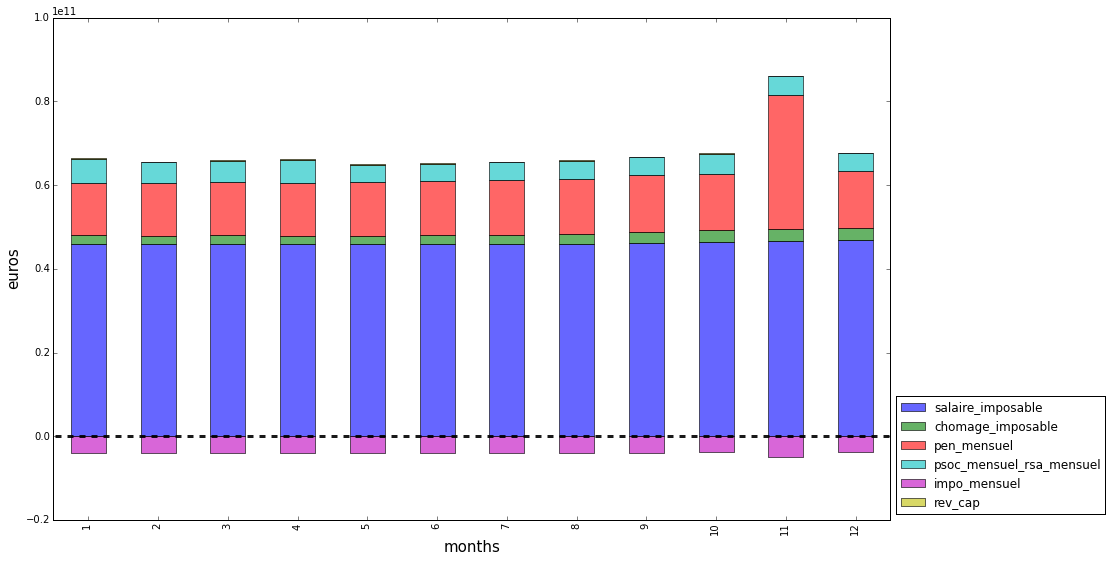

In [481]:
ax = revdisp_oy.plot(kind = 'bar', stacked = 'True',alpha = 0.6, figsize=(15,9) )
#ax = fig.add_subplot(111)

plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.9)

plt.xlabel("months", fontsize = 15)
plt.ylabel("euros", fontsize = 15)
plt.legend( bbox_to_anchor=(1, 0, 1, 1), loc=3,)
plt.savefig("image_result_of_mensualisation/revdisp_rsa_ir_comp_monthly.png")

In [482]:
revdisp_oy['total'] = revdisp_oy.sum(1)
print (revdisp_oy/10**9).to_latex()

\begin{tabular}{lrrrrrrr}
\toprule
{} &  salaire\_imposable &  chomage\_imposable &  pen\_mensuel &  psoc\_mensuel\_rsa\_mensuel &  impo\_mensuel &   rev\_cap &      total \\
\midrule
1  &          46.035288 &           1.988781 &    12.544919 &                  5.733982 &     -3.929586 &  0.081308 &  62.454692 \\
2  &          45.911349 &           1.966999 &    12.577170 &                  4.981279 &     -3.928374 &  0.081308 &  61.589732 \\
3  &          45.915476 &           2.084441 &    12.740929 &                  5.084543 &     -3.923851 &  0.081308 &  61.982846 \\
4  &          45.947659 &           1.934130 &    12.562599 &                  5.634469 &     -3.925586 &  0.081308 &  62.234580 \\
5  &          45.926885 &           1.995026 &    12.733947 &                  4.253051 &     -3.930659 &  0.081308 &  61.059559 \\
6  &          45.875387 &           2.120168 &    12.955677 &                  4.211006 &     -3.943819 &  0.081308 &  61.299728 \\
7  &          45.898869 

In [311]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['rev_trav_mensuel', 'pen_mensuel', 'chomage_imposable', 'pen_mensuel', 'ppe']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))))
    temp['psoc_mensuel'] = - pd.Series(np.sum(survey_scenario.simulation.calculate('psoc_mensuel', "2009-{}".format(month))))
    temp['impo'] = pd.Series(np.sum(survey_scenario.simulation.calculate('impo', "2009".format(month))))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy

,rev_trav_mensuel,pen_mensuel,chomage_imposable,ppe,psoc_mensuel,impo
1,91403200,27179322,3401369.75,388890.5625,-10032782.0,-7378242.666667
2,91100632,27200762,3339581.25,388890.5625,-6804533.5,-7378242.666667
3,91143888,27403234,3433212.50,388890.5625,-9449735.0,-7378242.666667
4,91095864,27280964,3356610.50,388890.5625,-10069107.0,-7378242.666667
5,91200832,27561876,3462323.00,388890.5625,-7646847.0,-7378242.666667
6,91363160,27925554,3621052.50,388890.5625,-7603293.0,-7378242.666667
7,91491304,28094176,3779776.50,388890.5625,-7606154.0,-7378242.666667
8,91880488,28543968,3978757.75,388890.5625,-7525756.5,-7378242.666667
9,92597016,29311400,4363786.00,388890.5625,-7476102.0,-7378242.666667
10,93915128,28707408,4971175.00,388890.5625,-7832963.0,-7378242.666667


In [312]:

undecompsed_revdisp = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    temp['revdisp_mensuel_annuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('revdisp_mensuel_annuel', "2009-{}".format(month))))
    undecompsed_revdisp = undecompsed_revdisp.append(temp, ignore_index=True)
    

In [313]:
undecompsed_revdisp.index = range(1,13)

In [314]:
df1 = pd.DataFrame({'revdisp_mensuel_annuel':revdisp_oy.sum(1).values}) 
df1.index = range(1,13)
(df1 - undecompsed_revdisp)/10**9

,revdisp_mensuel_annuel
1,-0.020164
2,-0.013908
3,-0.018994
4,-0.020194
5,-0.015315
6,-0.015075
7,-0.014926
8,-0.014555
9,-0.014050
10,-0.014208


In [308]:
undecompsed_revdisp.index = np.arange(-0.5,11.5,1)

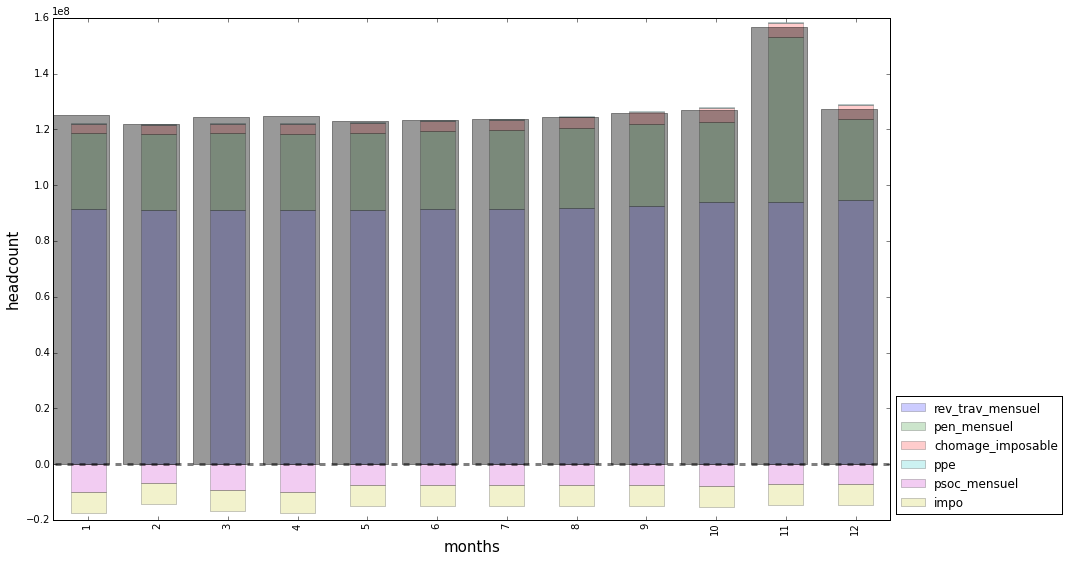

In [322]:
undecompsed_revdisp.index = np.arange(-0.5,11.5, 1) #TODO: pouruoi une différence ?
ax = revdisp_oy.plot(kind = 'bar', stacked = 'True',alpha = 0.2, figsize=(15,9) )
#ax = fig.add_subplot(111)
plt.bar(undecompsed_revdisp.index, undecompsed_revdisp.values, color = 'k', alpha = 0.4)
plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.5)

plt.xlabel("months", fontsize = 15)
plt.ylabel("headcount", fontsize = 15)
plt.legend( bbox_to_anchor=(1, 0, 1, 1), loc=3,)

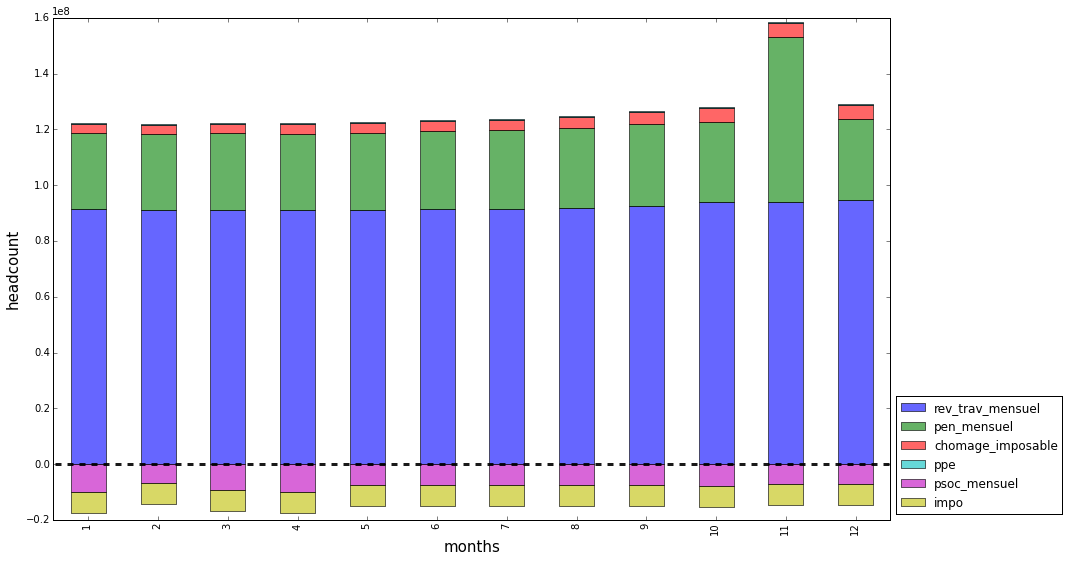

In [329]:
undecompsed_revdisp.index = np.arange(-0.5,11.5, 1) #TODO: pouruoi une différence ?
ax = revdisp_oy.plot(kind = 'bar', stacked = 'True',alpha = 0.6, figsize=(15,9) )
#ax = fig.add_subplot(111)

plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.9)

plt.xlabel("months", fontsize = 15)
plt.ylabel("headcount", fontsize = 15)
plt.legend( bbox_to_anchor=(1, 0, 1, 1), loc=3,)

In [246]:
undecompsed_revdisp


,revdisp_mensuel_annuel
1,125125552
2,121755256
3,124534760
4,124868728
5,122904312
6,123391968
7,123695984
8,124443120
9,125856608
10,126979136


## Monthly IR basis 

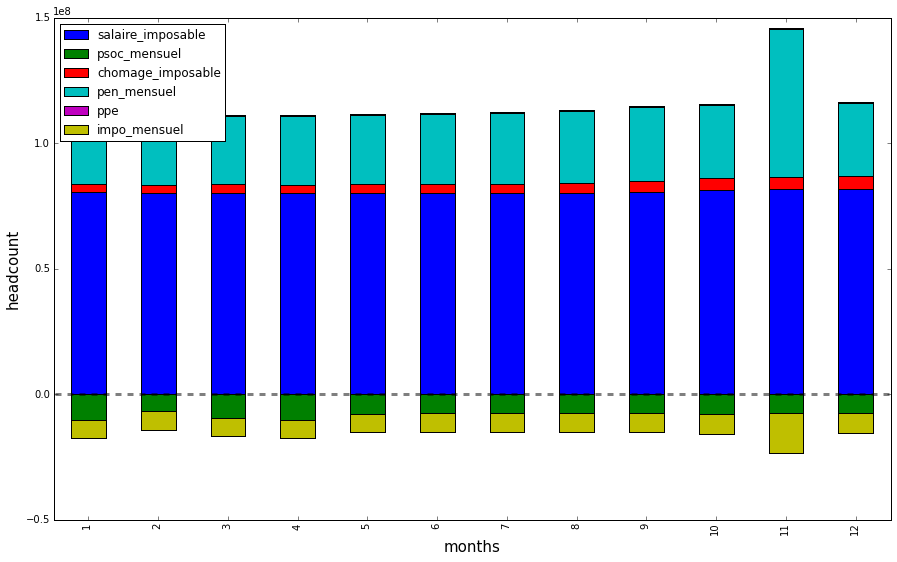

In [369]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel', 'psoc_mensuel', 'ppe', 'impo_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))))
        temp['psoc_mensuel'] = - pd.Series(np.sum(survey_scenario.simulation.calculate('psoc_mensuel', "2009-{}".format(month))))
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy
revdisp_oy.plot(kind = 'bar', stacked = 'True', figsize=(15,9) )
plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.5)
plt.xlabel("months", fontsize = 15)
plt.ylabel("headcount", fontsize = 15)
plt.legend( loc=2)

In [368]:
plt.close()
plt.figure()

#### With weight

In [364]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_individus))
    for var in ['psoc_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_familles))      
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('impo_mensuel', "2009".format(month))* weight_menages))/12
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))*weight_individus))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy.index = range(1,13)

revdisp_oy.plot(kind = 'bar', stacked = 'True', figsize=(15,9) )
plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.5)
plt.xlabel("months", fontsize = 15)
plt.ylabel("headcount", fontsize = 15)
plt.legend( loc=2)

AssertionError: Requested period 2009 differs from 2009-01 returned by variable impo_mensuel

In [370]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_individus))
    for var in ['psoc_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))* weight_familles))      
    temp['impo_mensuel'] = pd.Series(np.sum(survey_scenario.simulation.calculate('impo', "2009".format(month))* weight_menages))/12
    temp['rev_cap'] = pd.Series(np.sum(survey_scenario.simulation.calculate('rev_cap', "2009".format(month))))/12
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy/10**9

,salaire_imposable,chomage_imposable,pen_mensuel,psoc_mensuel,impo_mensuel,rev_cap
1,46.035288,1.988781,12.544919,5.331607,-4.00459,0.000147
2,45.911349,1.966999,12.577170,3.517861,-4.00459,0.000147
3,45.915476,2.084441,12.740929,5.004243,-4.00459,0.000147
4,45.947659,1.934130,12.562599,5.422800,-4.00459,0.000147
5,45.926885,1.995026,12.733947,4.045746,-4.00459,0.000147
6,45.875387,2.120168,12.955677,4.024281,-4.00459,0.000147
7,45.898869,2.211393,13.022996,4.036098,-4.00459,0.000147
8,45.964801,2.337075,13.255434,3.989299,-4.00459,0.000147
9,46.157049,2.538842,13.616544,3.963893,-4.00459,0.000147
10,46.501451,2.785263,13.339886,4.135864,-4.00459,0.000147


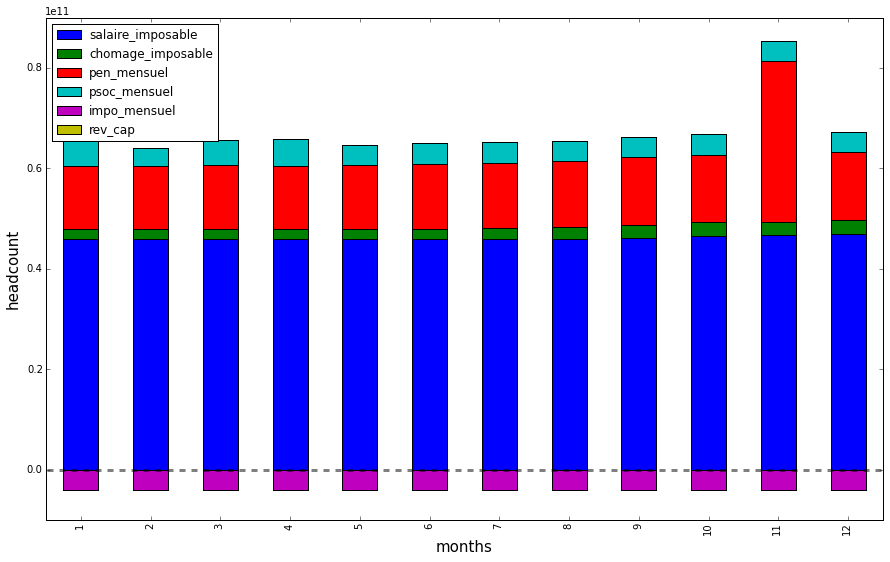

In [372]:
revdisp_oy.index = range(1,13)
revdisp_oy.index = range(1,13)

revdisp_oy.plot(kind = 'bar', stacked = 'True', figsize=(15,9) )
plt.hlines(0,-1,13, linestyles='dashed', linewidth = 3, alpha = 0.5)
plt.xlabel("months", fontsize = 15)
plt.ylabel("headcount", fontsize = 15)
plt.legend( loc=2)

In [371]:
revdisp_oy/10**9

,salaire_imposable,chomage_imposable,pen_mensuel,psoc_mensuel,impo_mensuel,rev_cap
1,46.035288,1.988781,12.544919,5.331607,-4.00459,0.000147
2,45.911349,1.966999,12.577170,3.517861,-4.00459,0.000147
3,45.915476,2.084441,12.740929,5.004243,-4.00459,0.000147
4,45.947659,1.934130,12.562599,5.422800,-4.00459,0.000147
5,45.926885,1.995026,12.733947,4.045746,-4.00459,0.000147
6,45.875387,2.120168,12.955677,4.024281,-4.00459,0.000147
7,45.898869,2.211393,13.022996,4.036098,-4.00459,0.000147
8,45.964801,2.337075,13.255434,3.989299,-4.00459,0.000147
9,46.157049,2.538842,13.616544,3.963893,-4.00459,0.000147
10,46.501451,2.785263,13.339886,4.135864,-4.00459,0.000147


In [363]:
print (revdisp_oy/10**9).to_latex()

\begin{tabular}{lrrrrrr}
\toprule
{} &  salaire\_imposable &  chomage\_imposable &  pen\_mensuel &  psoc\_mensuel &  impo\_mensuel &   rev\_cap \\
\midrule
1  &          46.035288 &           1.988781 &    12.544919 &      5.331607 &      -4.00459 &  0.081308 \\
2  &          45.911349 &           1.966999 &    12.577170 &      3.517861 &      -4.00459 &  0.081308 \\
3  &          45.915476 &           2.084441 &    12.740929 &      5.004243 &      -4.00459 &  0.081308 \\
4  &          45.947659 &           1.934130 &    12.562599 &      5.422800 &      -4.00459 &  0.081308 \\
5  &          45.926885 &           1.995026 &    12.733947 &      4.045746 &      -4.00459 &  0.081308 \\
6  &          45.875387 &           2.120168 &    12.955677 &      4.024281 &      -4.00459 &  0.081308 \\
7  &          45.898869 &           2.211393 &    13.022996 &      4.036098 &      -4.00459 &  0.081308 \\
8  &          45.964801 &           2.337075 &    13.255434 &      3.989299 &      -4.00459 &  

## Monthly IR compensated

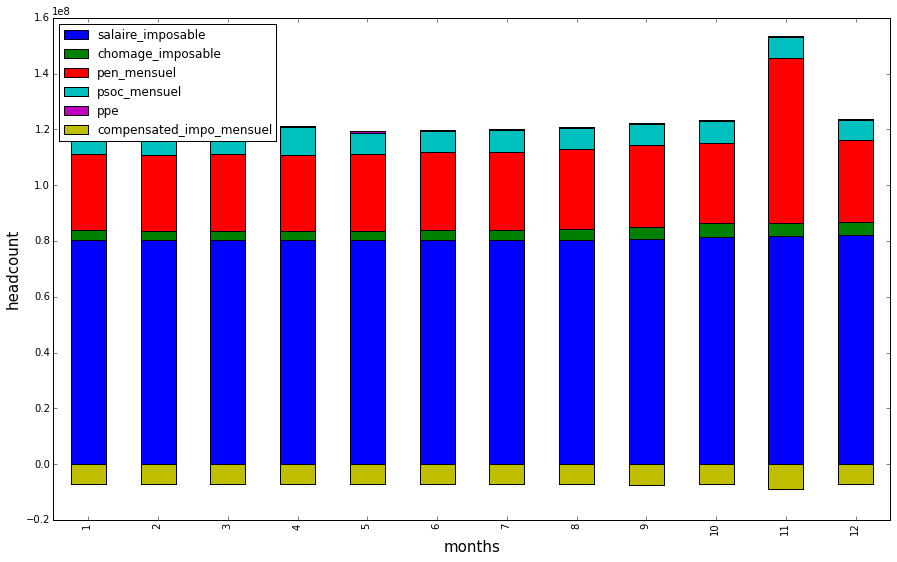

In [186]:
revdisp_oy = pd.DataFrame()
temp = pd.DataFrame()
for month in range(1,13):
    for var in ['salaire_imposable', 'chomage_imposable', 'pen_mensuel', 'psoc_mensuel', 'ppe', 'compensated_impo_mensuel']:
        temp[var] = pd.Series(np.sum(survey_scenario.simulation.calculate(var, "2009-{}".format(month))))
    revdisp_oy = revdisp_oy.append(temp, ignore_index=True)
revdisp_oy.index = range(1,13)
revdisp_oy
revdisp_oy.plot(kind = 'bar', stacked = 'True', figsize=(15,9) )
plt.xlabel("months", fontsize = 15)
plt.ylabel("headcount", fontsize = 15)
plt.legend( loc=2)

In [219]:
revdisp_oy = pd.DataFrame()
for month in range(1,13):
    revdisp_oy['{}'.format(month)] = pd.Series(survey_scenario.simulation.calculate("rev_trav_mensuel", "2009-{}".format(month)))

In [220]:
'a'

'a'

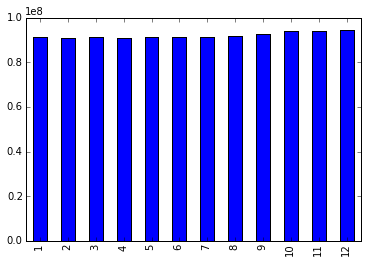

In [221]:
revdisp_oy.sum(0).plot(kind = 'bar', color = 'b')

#### By income type

(80000000, 90000000.0)

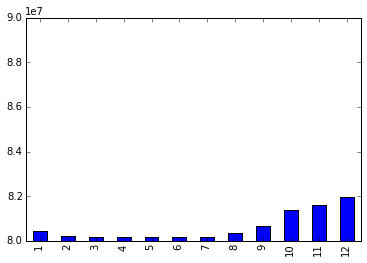

In [151]:
revdisp_oy = pd.DataFrame()
for month in range(1,13):
    revdisp_oy['{}'.format(month)] = pd.Series(survey_scenario.simulation.calculate("salaire_imposable", "2009-{}".format(month)))

revdisp_oy.sum(0).plot(kind = 'bar')
plt.ylim(8*10**7)


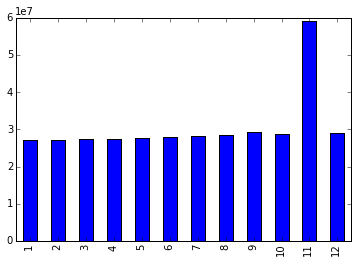

In [152]:
revdisp_oy = pd.DataFrame()
for month in range(1,13):
    revdisp_oy['{}'.format(month)] = pd.Series(survey_scenario.simulation.calculate("pen_mensuel", "2009-{}".format(month)))

revdisp_oy.sum(0).plot(kind = 'bar')


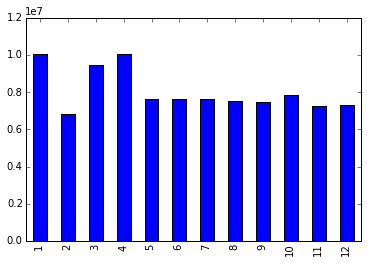

In [153]:
revdisp_oy = pd.DataFrame()
for month in range(1,13):
    revdisp_oy['{}'.format(month)] = pd.Series(survey_scenario.simulation.calculate("psoc_mensuel", "2009-{}".format(month)))

revdisp_oy.sum(0).plot(kind = 'bar')


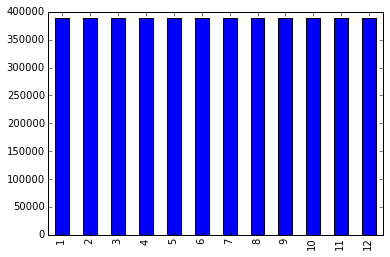

In [154]:
revdisp_oy = pd.DataFrame()
for month in range(1,13):
    revdisp_oy['{}'.format(month)] = pd.Series(survey_scenario.simulation.calculate("ppe", "2009-{}".format(month)))

revdisp_oy.sum(0).plot(kind = 'bar')


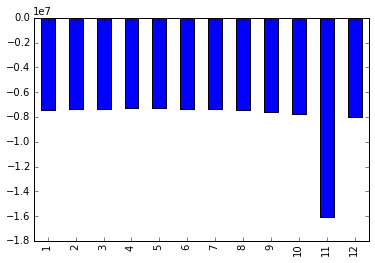

In [155]:
revdisp_oy = pd.DataFrame()
for month in range(1,13):
    revdisp_oy['{}'.format(month)] = pd.Series(survey_scenario.simulation.calculate("impo_mensuel", "2009-{}".format(month)))

revdisp_oy.sum(0).plot(kind = 'bar')


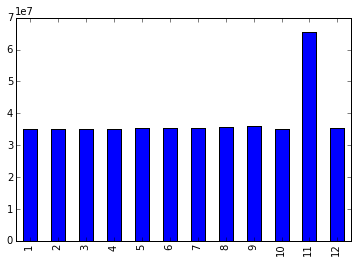

In [156]:
revdisp_oy = pd.DataFrame()
for month in range(1,13):
    revdisp_oy['{}'.format(month)] = pd.Series(survey_scenario.simulation.calculate("retraite_imposable", "2009-{}".format(month)))

revdisp_oy.sum(0).plot(kind = 'bar')


In [157]:
survey_scenario.simulation.calculate("retraite_imposable", "2009-{}".format(month))

array([ 2260.33325195,     0.        ,     0.        , ...,     0.        ,
           0.        ,     0.        ], dtype=float32)

# END

### Taux d'intérêt

In [158]:
def revdisp_tx(var = None, taux = None):
    revdisp_i = 0
    for month in range(0,12):
        monthly_taux = ((1+taux)**(1/12)) 
        revdisp_i += (
            survey_scenario.simulation.calculate(var, survey_scenario.simulation.period.offset(month, 'month').this_month) 
            / (monthly_taux)**month 
                      )
    return revdisp_i


In [159]:
revdisp_tx('revdisp_mensuel_ir_mensuel', 1.6)

array([ 25243.11132812,   3604.85766602,  21505.01757812, ...,
        38417.91796875,  22285.91210938,   4455.68945312], dtype=float32)

In [160]:
survey_scenario.simulation.period.offset(2, 'month').this_month

Period((u'month', Instant((2009, 3, 1)), 1))